# **Olist E-Commerce Analysis**

Author: Sathya Narendra & Lila Anas Anggraeni

Date Created: 2025-07-26

Dashboard Link:
https://lookerstudio.google.com/reporting/23e1ceab-cd73-41f3-adb9-05d6be7dd75e

Dashboard User Guide:
https://docs.google.com/document/d/1QIwHhstCdPF40xpe8b_99GdS-g68xyIZou24zoF2uNo/edit?usp=sharing

Description:
This notebook contains analysis to support business insights for the Olist e-commerce platform.
It explores key metrics such as delivery delays, customer review patterns, payment behavior, and top seller performance—serving as the basis for dashboard visualizations and strategic recommendations.

## **Company Overview and Business Challenges**

Olist is a Brazilian e-commerce enabler founded in 2015 that empowers small and medium-sized businesses (SMBs) to sell across multiple major marketplaces such as Mercado Livre, Amazon Brazil, and Magalu. Instead of building their own online stores, sellers can manage product listings, inventory, logistics, and payments from a single integrated platform. This unified system helps SMBs grow more efficiently in Brazil’s increasingly competitive digital market.

In a highly competitive e-commerce landscape, customer satisfaction, payment convenience, seller performance, and sales growth are key pillars of long-term success. Olist, as a marketplace platform, connects a diverse range of sellers and buyers across Brazil—but recent trends signal critical areas for improvement. **Reviews indicate potential dissatisfaction** linked to delivery delays and product experiences. Additionally, while sales grew significantly in 2017, **the sales trend has stagnated** since late 2018. This project seeks to uncover the root causes of these issues and provide actionable insights using Olist's transactional and operational data.




## **Key Stakeholders**

To ensure the insights from this analysis are aligned with business goals, we identified two key stakeholder teams who would benefit the most from this project:

1. Customer Experience Team — to identify pain points, especially around negative reviews and delivery issues.

2. Sales and Business Development Team — to uncover opportunities for sales growth, optimize seller performance, and address the geographic concentration of top sellers.

## **Business Objectives and Analytical Breakdown**

To address key business goals and extract actionable insights from the Olist datasets, this project is organized into four primary objectives. Each is broken down into specific sub-objectives based on the available data.

**1. Improve customer satisfaction through better service**

Customer experience is critical in building trust and ensuring repeat purchases. This analysis focuses on:

- **Delivery Duration vs Review Score**  
  Calculating the average delivery duration (in days) for each review score to determine whether lower reviews are often linked to longer delivery times.

- **Product Category vs Review Score**  
  Analyzing the number of reviews per product category to identify which product categories frequently receive low ratings.

- **Payment Amount vs Review Score**  
  Examining the average payment value for each review score to see if lower-value purchases tend to correlate with poor ratings.


**2. Support business strategies around high-demand payment methods**

Understanding payment behavior can help shape financial strategies and improve transaction processes. This involves:

- Identifying the **most frequently used payment methods**.

- Analyzing whether **certain payment types** are associated with **higher or lower purchase amounts**.


**3. Expand High-Quality Seller Network Across Regions**

To ensure platform sustainability and reduce geographical dependency, it is essential to distribute seller excellence more evenly across the country, this objective includes:

- Identifying the **top 10% of sellers** based on review ratings and total sales.

- Understanding the **product categories and individual items** sold by high-performing sellers.

- Exploring whether top- or low-performing sellers are concentrated in specific regions.


**4. Increase Sales Performance through Data-Driven Product & Market Insights**

Recent sales trends indicate stagnation and even slight decline, signaling the need for strategic actions. This objective explores:

- The **top 5 product categories** by total sales.

- **Sales trends over time** for top-performing categories.

- **Sales distribution by region** for popular categories.

- Identification of **slow-moving product categories** and whether some items within them still show strong performance.

- Exploration of **seasonal demand patterns** in underperforming categories.

## **1. Data Import and Description**

### **1.1 Data Background**

Firstly we need to clearly define the background to the project and the problem that data analysis and visualization can help resolve.

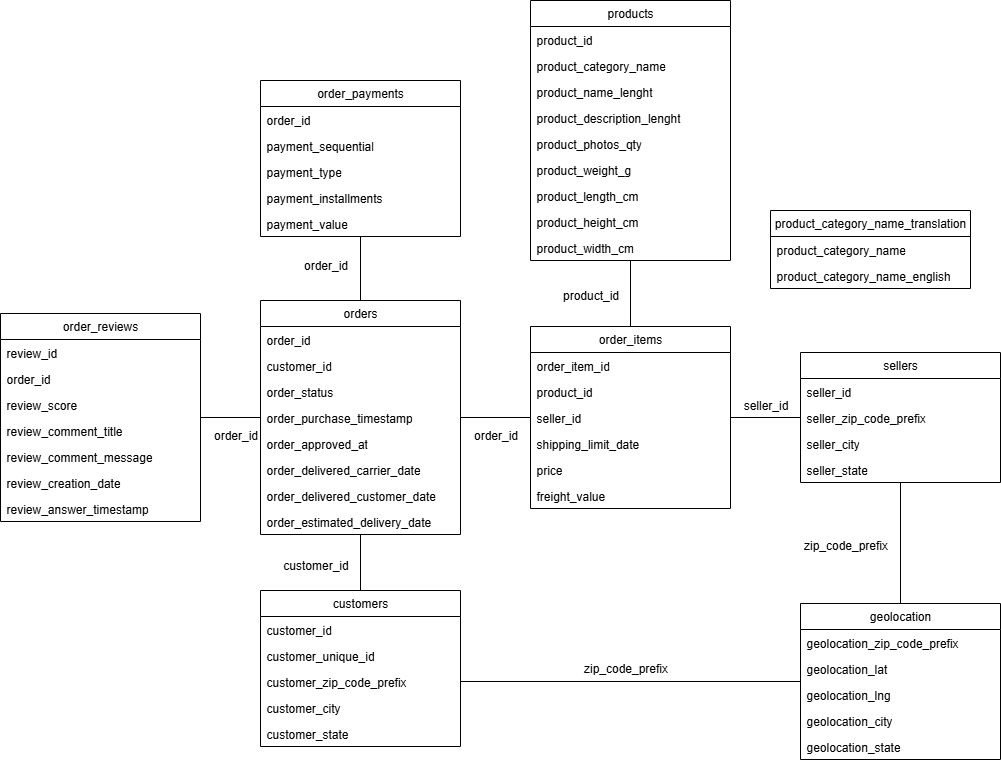

The Olist Store Dataset is a dataset from a Brazilian e-commerce platform. Customers may browse products and purchase them from merchants on the platform, in which the products will be delivered to them and reviews can be given to said merchants.

Below are the source of the dataset, and the imported data to Google Sheets, which is integrated to the project through Google Colab.

1. source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download
2. main dataset: https://docs.google.com/spreadsheets/d/1dsOHNU_2WO4_t9jjG-CDMp0b8VeYzp7YwEbJDnKtT4Q/edit?usp=sharing
3. geolocation dataset: https://docs.google.com/spreadsheets/d/1Tw2TIv2bcDz3SVtSTkzBlvN346owbQfkUn2QtAPU1lM/edit?usp=sharing

### **1.2 Import Data**

Here we import helper Python libraries and the .csv file to explore and process the data.

In [1]:
# Import required dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
from google.colab import auth
from urllib.parse import quote

In [2]:
# Import the dataset from Google Sheets - generate the URL
auth.authenticate_user()
sheet_id = '1dsOHNU_2WO4_t9jjG-CDMp0b8VeYzp7YwEbJDnKtT4Q'
geo_sheet_id = '1Tw2TIv2bcDz3SVtSTkzBlvN346owbQfkUn2QtAPU1lM'

sheets = ['customers', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'product_category_name_translation']
encoded_sheets = {}

for sheet in sheets:
  encoded_sheet = quote(sheet)
  url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={encoded_sheet}'
  encoded_sheets[sheet] = url

geo_url = f'https://docs.google.com/spreadsheets/d/{geo_sheet_id}/gviz/tq?tqx=out:csv&sheet=geolocation'

In [3]:
# Import the dataset from Google Sheets - import the data from the generated URL
dataframes = {}
for sheet, url in encoded_sheets.items():
  try:
    df = pd.read_csv(url)
    dataframes[sheet] = df
    print(f"Successfully loaded sheet: {sheet}")
  except Exception as e:
    print(f"Error loading sheet {sheet}: {e}")

try:
  geo_df = pd.read_csv(geo_url)
  dataframes['geolocation'] = geo_df
  print("Successfully loaded sheet: geolocation")
except Exception as e:
  print(f"Error loading sheet geolocation: {e}")

Successfully loaded sheet: customers
Successfully loaded sheet: order_items
Successfully loaded sheet: order_payments
Successfully loaded sheet: order_reviews
Successfully loaded sheet: orders
Successfully loaded sheet: products
Successfully loaded sheet: sellers
Successfully loaded sheet: product_category_name_translation
Successfully loaded sheet: geolocation


In [4]:
for key, value in dataframes.items():
  print(key)

customers
order_items
order_payments
order_reviews
orders
products
sellers
product_category_name_translation
geolocation


## **2. Data Cleaning & Joining Data**

In this section, data will be cleaned by detecting and handling of:
1. Duplicate data
2. Null/missing data

After that we will perform data joining to combine all the dataframes into a unified entity. The unified dataframe will undergo cleaning again with the addition of outlier handling to gain insight and increase usability.

### **2.1 Duplicate Data Handling**
First we detect duplicate values and remove if there are any.

In [5]:
# Check for duplicate values
duplicates = []
for name, df in dataframes.items():
  dupe_count = df.duplicated().value_counts()
  total_rows = len(df)
  dupes = dupe_count.get(True, 0)
  duplicates.append({'Dataframe': name, 'Total Rows': total_rows, 'Duplicate Rows': dupes})

duplicates_df = pd.DataFrame(duplicates)
display(duplicates_df)

Dataframe  Total Rows  Duplicate Rows
0                          customers       99441               0
1                        order_items      112650               0
2                     order_payments      103886               0
3                      order_reviews       99224               0
4                             orders       99441               0
5                           products       32951               0
6                            sellers        3095               0
7  product_category_name_translation          71               0
8                        geolocation     1000163          261836

No duplicate values are found in the applicable dataframes. We will not be deleting duplicate values in 'geolocation', as there might be orders that originate or end at the same location multiple times.

### **2.2 Missing Data Handling**
Next, we may check for missing values in each column of the dataframe. We handle missing values in each column in the following ways:
1. Drop missing values in the column if there are fewer than 5% missing values
2. Impute missing values with the column average if there are between 5% and 15% missing values
3. Drop the column otherwise

Furthermore, to determine which average to use when imputing columns, we use:
1. Mean: For measures (quantitative columns) with normal distribution
2. Median: For measures with not normal distribution
3. Mode: For dimensions (qualitative columns)

In [6]:
# Check for null columns in every dataframe

def null_values_checker():
  null_columns = []

  for name, df in dataframes.items():
    null_amounts = df.isnull().sum()
    df_len = len(df)
    null_percentages = round(null_amounts[null_amounts > 0] / df_len * 100, 2)

    for column, percentage in null_percentages.items():
      null_columns.append({'Dataframe': name, 'Column': column, 'Null Percentage(%)': percentage})

  null_columns_df = pd.DataFrame(null_columns)
  display(null_columns_df)

null_values_checker()

Dataframe                         Column  Null Percentage(%)
0   order_reviews           review_comment_title               88.34
1   order_reviews         review_comment_message               58.71
2          orders              order_approved_at                0.16
3          orders   order_delivered_carrier_date                1.79
4          orders  order_delivered_customer_date                2.98
5        products          product_category_name                1.85
6        products            product_name_lenght                1.85
7        products     product_description_lenght                1.85
8        products             product_photos_qty                1.85
9        products               product_weight_g                0.01
10       products              product_length_cm                0.01
11       products              product_height_cm                0.01
12       products               product_width_cm                0.01

Since most columns with null values have less than 5% missing values, we will drop said rows instead of performing imputation. Furthermore, review related null values will be deleted as they have many missing values and Natural Language Processing (NLP) is beyond the scope of this project.

In [7]:
# Drop missing values in all dataframes except 'order_reviews'
for name, df in dataframes.items():
  if name != 'order_reviews':
    df.dropna(inplace=True)

In [8]:
# Drop review_comment_title and review_comment_message from order_reviews
dataframes['order_reviews'].drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

In [9]:
null_values_checker()

Empty DataFrame
Columns: []
Index: []

### **2.3 Join Dataframes**

After we check for null and duplicate values, we can join all dataframes into a single dataframe to be processed further

In [10]:
# Merge main dataframes
merged_df = pd.merge(dataframes['orders'], dataframes['order_payments'], on='order_id', how='left')
merged_df = pd.merge(merged_df, dataframes['order_reviews'], on='order_id', how='left')
merged_df = pd.merge(merged_df, dataframes['customers'], on='customer_id', how='left')
merged_df = pd.merge(merged_df, dataframes['order_items'], on='order_id', how='left')
merged_df = pd.merge(merged_df, dataframes['products'], on='product_id', how='left')
merged_df = pd.merge(merged_df, dataframes['product_category_name_translation'], on='product_category_name', how='left')
merged_df = pd.merge(merged_df, dataframes['sellers'], on='seller_id', how='left')

In [11]:
# Clean geolocation dataframe to reduce size
geo_cleaned = dataframes['geolocation'].groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

In [12]:
# Create new geolocation data for both customers and sellers and join them
geolocation_customers = geo_cleaned.copy()
geolocation_customers.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
                                       'geolocation_lat': 'customer_lat',
                                       'geolocation_lng': 'customer_lng'}, inplace=True)
merged_df = pd.merge(merged_df, geolocation_customers, on='customer_zip_code_prefix', how='left')

geolocation_sellers = geo_cleaned.copy()
geolocation_sellers.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
                                     'geolocation_lat': 'seller_lat',
                                     'geolocation_lng': 'seller_lng'}, inplace=True)
merged_df = pd.merge(merged_df, geolocation_sellers, on='seller_zip_code_prefix', how='left')

In [13]:
pd.options.display.max_columns = None
display(merged_df.head())

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  payment_sequential payment_type  \
0           2017-10-18 00:00:00                 1.0  credit_card   
1           2017-10-18 00:00:00                 3.0      voucher   
2           2017-10-18 00:00:00                 2.0      voucher   
3           2018-08-13 00:00:00                 1.0       boleto   
4           2018-09-04 00:00:00                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

   review_score review_creation_date review_answer_timestamp  \
0           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
1           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
2           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
3           4.0  2018-08-08 00:00:00     2018-08-08 18:37:50   
4           5.0  2018-08-18 00:00:00     2018-08-22 19:07:58   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813     barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265    vianopolis   

  customer_state  order_item_id                        product_id  \
0             SP              1  87285b34884572647811a353c7ac498a   
1             SP              1  87285b34884572647811a353c7ac498a   
2             SP              1  87285b34884572647811a353c7ac498a   
3             BA              1  595fac2a385ac33a80bd5114aec74eb8   
4             GO              1  aa4383b373c6aca5d8797843e5594415   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
2  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
3  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
4  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   

   freight_value  product_category_name  product_name_lenght  \
0           8.72  utilidades_domesticas                 40.0   
1           8.72  utilidades_domesticas                 40.0   
2           8.72  utilidades_domesticas                 40.0   
3          2

In [14]:
merged_df.describe()

payment_sequential  payment_installments  payment_value   review_score  \
count       115703.000000         115703.000000  115703.000000  114845.000000   
mean             1.091285              2.940823     171.812134       4.080317   
std              0.686787              2.776211     265.659388       1.347799   
min              1.000000              0.000000       0.000000       1.000000   
25%              1.000000              1.000000      60.840000       4.000000   
50%              1.000000              2.000000     108.110000       5.000000   
75%              1.000000              4.000000     188.940000       5.000000   
max             26.000000             24.000000   13664.080000       5.000000   

       customer_zip_code_prefix  order_item_id          price  freight_value  \
count             115706.000000  115706.000000  115706.000000  115706.000000   
mean               35080.148272       1.197077     119.907518      19.981514   
std                29855.259056       0.701268     182.679745      15.719324   
min                 1003.000000       1.000000       0.850000       0.000000   
25%                11310.000000       1.000000      39.900000      13.080000   
50%                24320.000000       1.000000      74.900000      16.280000   
75%                58806.250000       1.000000     132.900000      21.160000   
max                99980.000000      21.000000    6735.000000     409.680000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count        114068.000000               114068.000000       114068.000000   
mean             48.801846                  784.831636            2.206500   
std              10.016883                  650.566836            1.718029   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  345.000000            1.000000   
50%              52.000000                  600.000000            1.000000   
75%              57.000000                  983.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count     114068.000000      114068.000000      114068.000000   
mean        2108.494644          30.288451          16.606673   
std         3768.352750          16.157703          13.439252   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  seller_zip_code_prefix   customer_lat   customer_lng  \
count     114068.000000           115706.000000  115403.000000  115403.000000   
mean          23.104806            24455.029065     -21.239964     -46.200468   
std           11.739507            27587.160150       5.557109       4.039699   
min            6.000000             1001.000000     -33.689948     -72.668881   
25%           15.000000             6429.000000     -23.590632     -48.109940   
50%           20.000000            13660.000000     -22.928413     -46.632143   
75%           30.000000            27930.000000     -20.188080     -43.630451   
max          118.000000            99730.000000      42.184003      -8.723762   

          seller_lat     seller_lng  
count  115445.000000  115445.000000  
mean      -22.794917     -47.240072  
std         2.698223       2.340413  
min       -32.079231     -63.893565  
25%       -23.607473     -48.829744  
50%       -23.425556     -46.755753  
75%       -21.757321     -46.518679  
max        -2.501242     -34.855616

In [15]:
merged_df.describe(include='object')

order_id                       customer_id  \
count                             115706                            115706   
unique                             96461                             96461   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   

       order_status order_purchase_timestamp    order_approved_at  \
count        115706                   115706               115706   
unique            2                    95939                88272   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115699                       63                   63   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        115706                        115706   
unique                        80100                         95649   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   

       order_estimated_delivery_date payment_type  \
count                         115706       115703   
unique                           445            4   
top              2017-12-20 00:00:00  credit_card   
freq                             647        85371   

                               review_id review_creation_date  \
count                             114845               114845   
unique                             95630                  627   
top     eef5dbca8d37dfce6db7d7b16dd0525e  2017-12-19 00:00:00   
freq                                  63                  533   

       review_answer_timestamp                customer_unique_id  \
count                   114845                            115706   
unique                   95477                             93342   
top        2017-08-17 22:17:55  9a736b248f67d166d2fbb006bcb877c3   
freq                        63                                75   

       customer_city customer_state                        product_id  \
count         115706         115706                            115706   
unique          4085             27                             32210   
top        sao paulo             SP  aca2eb7d00ea1a7b8ebd4e68314663af   
freq           18299          48805                               529   

                               seller_id  shipping_limit_date  \
count                             115706               115706   
unique                              2970                91327   
top     4a3ca9315b744ce9f8e9374361493884  2017-08-14 20:43:31   
freq                                2116                   63   

       product_category_name product_category_name_english seller_city  \
count                 114068                        114045      115706   
unique                    73                            71         595   
top          cama_mesa_banho                bed_bath_table   sao paulo   
freq                   11813                         11813       28641   

       seller_state  
count        115706  
unique           22  
top              SP  
freq          82549

In [16]:

object_columns = merged_df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = merged_df.select_dtypes(include=np.number).columns.tolist()

object_df = pd.DataFrame(object_columns, columns=['Object Column Name'])
numeric_df = pd.DataFrame(numeric_columns, columns=['Numeric Column Name'])

print("Object Type Columns:")
display(object_df)

print("\nNumeric Type Columns:")
display(numeric_df)

Object Type Columns:


Object Column Name
0                        order_id
1                     customer_id
2                    order_status
3        order_purchase_timestamp
4               order_approved_at
5    order_delivered_carrier_date
6   order_delivered_customer_date
7   order_estimated_delivery_date
8                    payment_type
9                       review_id
10           review_creation_date
11        review_answer_timestamp
12             customer_unique_id
13                  customer_city
14                 customer_state
15                     product_id
16                      seller_id
17            shipping_limit_date
18          product_category_name
19  product_category_name_english
20                    seller_city
21                   seller_state


Numeric Type Columns:


Numeric Column Name
0           payment_sequential
1         payment_installments
2                payment_value
3                 review_score
4     customer_zip_code_prefix
5                order_item_id
6                        price
7                freight_value
8          product_name_lenght
9   product_description_lenght
10          product_photos_qty
11            product_weight_g
12           product_length_cm
13           product_height_cm
14            product_width_cm
15      seller_zip_code_prefix
16                customer_lat
17                customer_lng
18                  seller_lat
19                  seller_lng

After we join the dataframes, we can check whether some data have proper formatting or labelling. For this data, we will check some categorical data to ensure no data has similar or wrong formatting.

In [17]:
# Show value counts for specified object columns in a table format
columns_to_display = ['order_status', 'payment_type', 'customer_state', 'seller_state']

for column in columns_to_display:
  print(f"Value counts for {column}:")
  display(merged_df[column].value_counts().reset_index(name='count'))
  print("\n")

Value counts for order_status:


order_status   count
0    delivered  115699
1     canceled       7



Value counts for payment_type:


payment_type  count
0  credit_card  85371
1       boleto  22490
2      voucher   6181
3   debit_card   1661



Value counts for customer_state:


customer_state  count
0              SP  48805
1              RJ  14963
2              MG  13494
3              RS   6428
4              PR   5894
5              SC   4240
6              BA   3950
7              DF   2447
8              GO   2395
9              ES   2318
10             PE   1840
11             CE   1503
12             PA   1097
13             MT   1082
14             MS    848
15             MA    822
16             PB    624
17             RN    563
18             PI    554
19             AL    445
20             SE    386
21             TO    334
22             RO    281
23             AM    170
24             AC     94
25             AP     83
26             RR     46



Value counts for seller_state:


seller_state  count
0            SP  82549
1            MG   9077
2            PR   8874
3            RJ   4900
4            SC   4193
5            RS   2262
6            DF    932
7            BA    681
8            GO    537
9            PE    462
10           MA    407
11           ES    382
12           MT    146
13           CE     99
14           MS     60
15           RN     56
16           PB     43
17           RO     14
18           PI     11
19           SE     10
20           PA      8
21           AM      3

From the tables above, we can see that there are no categories which represent the same type of objects. There are no typos or inconsistent labelling.

### **2.3 Data Cleaning 2**

After we join the dataframes, we may perform data cleaning again to ensure that the merge does not result in duplicate or missing values. In this process we will also perform outlier handling.

In [18]:
# Check and handle duplicate values
print(len(merged_df))
print(merged_df.duplicated().value_counts())

115706
False    115706
Name: count, dtype: int64


From the code above, we can see that there are no duplicate values.

In [19]:
# Check for null values in the data
# Show all columns with null values and the percentage

def show_merged_df_nulls():
  null_amounts = merged_df.isnull().sum()
  n = round(null_amounts[null_amounts > 0] / len(merged_df) * 100, 2).reset_index()
  n.rename(columns={'index': 'Column', 0: 'Percentage of nulls (%)'}, inplace=True)
  display(n)

show_merged_df_nulls()

Column  Percentage of nulls (%)
0              payment_sequential                     0.00
1                    payment_type                     0.00
2            payment_installments                     0.00
3                   payment_value                     0.00
4                       review_id                     0.74
5                    review_score                     0.74
6            review_creation_date                     0.74
7         review_answer_timestamp                     0.74
8           product_category_name                     1.42
9             product_name_lenght                     1.42
10     product_description_lenght                     1.42
11             product_photos_qty                     1.42
12               product_weight_g                     1.42
13              product_length_cm                     1.42
14              product_height_cm                     1.42
15               product_width_cm                     1.42
16  product_category_name_english                     1.44
17                   customer_lat                     0.26
18                   customer_lng                     0.26
19                     seller_lat                     0.23
20                     seller_lng                     0.23

After rechecking null values with the merged dataframe, we found rows with missing values. Rows with null values will be dropped, as all columns consists of less than 5% null values.

In [20]:
# Drop rows from all columns with less than 5% null values
null_percentages = merged_df.isnull().sum() / len(merged_df) * 100
cols_to_drop_rows = null_percentages[null_percentages < 5].index

# Drop rows with null values in these columns
merged_df.dropna(subset=cols_to_drop_rows, inplace=True)

In [21]:
show_merged_df_nulls()

Empty DataFrame
Columns: [Column, Percentage of nulls (%)]
Index: []

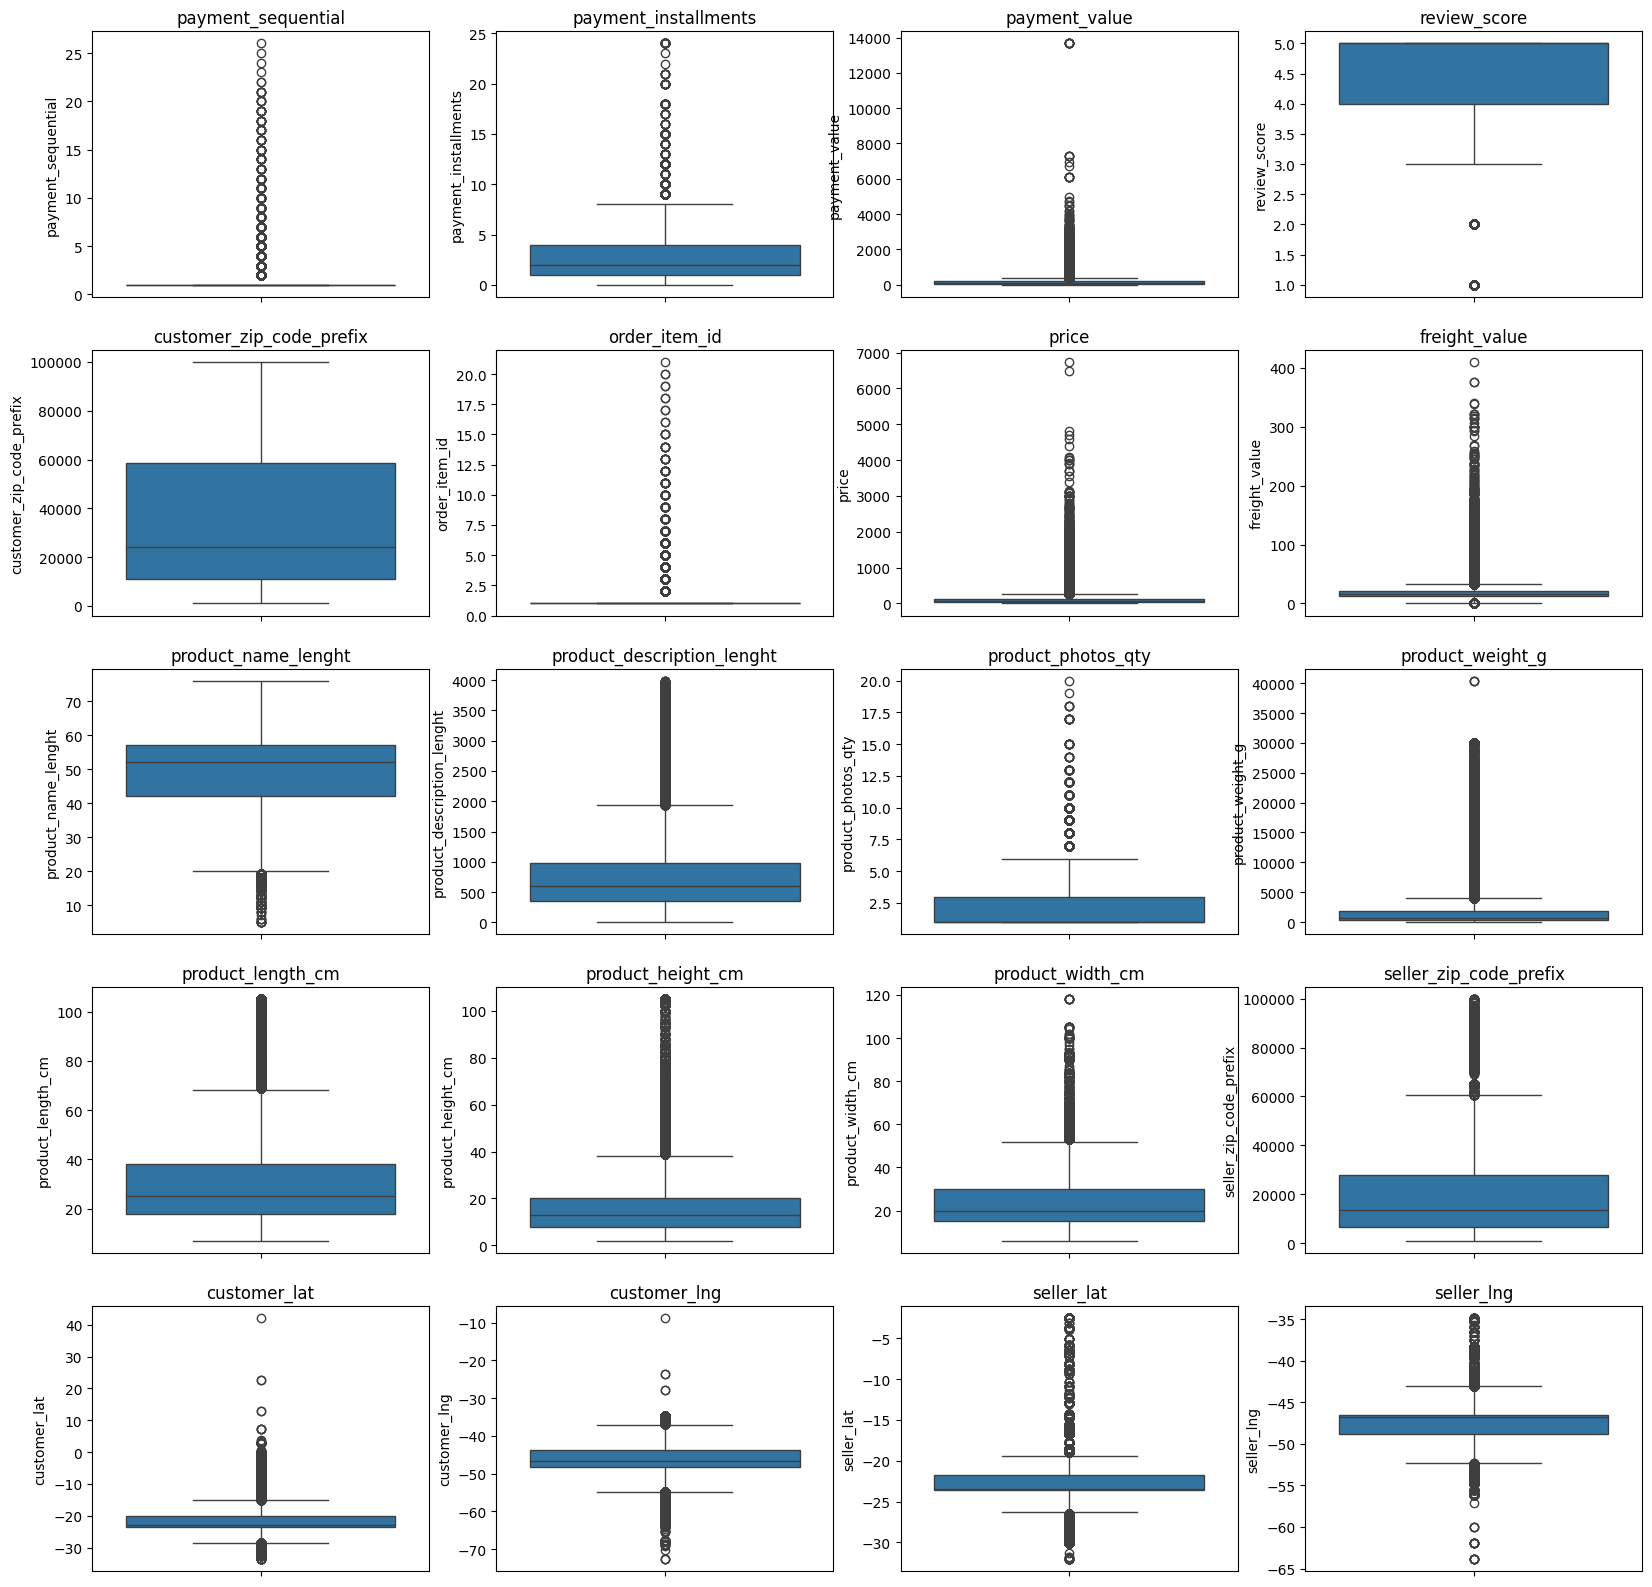

In [22]:
# Detect outliers for each measure
ms_columns = ['payment_sequential', 'payment_installments',	'payment_value',	'review_score',	'customer_zip_code_prefix',	'order_item_id',
              'price',	'freight_value',	'product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g',
              'product_length_cm',	'product_height_cm',	'product_width_cm',	'seller_zip_code_prefix',	'customer_lat',	'customer_lng',	'seller_lat',	'seller_lng']

n_cols = 4
n_rows = (len(ms_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(ms_columns):
  sns.boxplot(y=merged_df[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.show()

From the box plots above, we can see the distribution of various measures within the dataframe. There are many variables beyond the minimum and maximum values of the lower and upper whiskers; however, there are no questionable values, such as negative payment data.

Below are reasons why the outliers in some columns are within expectations:

1. payment_sequential: It is within measurement as customers can pay using more than one method, such as when instalments are used.

2. payment_installments: Related to payment_sequential, customers may opt to pay over a lengthy period, especially for expensive products.

3. payment_value: Outliers are within expectations as some users may purchase many products in one transaction which increases the total payment value.

4. price: Outliers are within expectations as products within the Olist catalogue may consist of premium products which has high cost.

5. freight_value: Outliers in this category may be because of long inter-state travel with long distance.

6. product dimension columns: Outliers in these categories are within expectations as Olist has catalogues of furnitures and other heavy objects.

## **3. Data Transformation**

After the data is cleaned, we can create new columns to provide more insight from the data and show correct labels for numeric categorical columns. This process also includes transforming columns into appropriate data types. In this section, we will create three new columns to enhance our analysis:

**1. delivery_duration_days** ; calculates how many days it took for a product to be delivered after the order was placed. A higher number indicates longer delivery times.

**2. delivery_delay_days** ; measures the difference between the actual delivery date and the estimated delivery date.

  *   Positive values indicate late deliveries (delivered after the estimated date).
  *  Negative values indicate early deliveries (delivered before the estimated date).

**3. is_digital_payment**
This column classifies payment types into "Digital" and "Non-Digital".

  *   Digital payments include: credit_card, debit_card
  *   Other payment types such as boleto and voucher are considered Non-Digital

**4. customer_coordinate**
This column combines customer_lat and customer_lng into one column to be able to be displayed properly in Looker Studio

**5. seller_coordinate**
This column combines seller_lat and seller_lng into one column to be able to be displayed properly in Looker Studio

**6. customer_state_name**
This column shows the full name of customer states

**7. seller_state_name**
This column shows the full name of seller states

These new columns will help us better understand delivery performance and customer behavior based on payment methods.

In [23]:
# Make a copy of the dataframe
transformed_df = merged_df.copy()

In [24]:
# Make sure the date columns are in datetime format
transformed_df['order_purchase_timestamp'] = pd.to_datetime(transformed_df['order_purchase_timestamp'])
transformed_df['order_delivered_customer_date'] = pd.to_datetime(transformed_df['order_delivered_customer_date'])
transformed_df['order_estimated_delivery_date'] = pd.to_datetime(transformed_df['order_estimated_delivery_date'])

# 1. delivery_duration_days
# Calculates how many days it took from purchase to delivery
transformed_df['delivery_duration_days'] = (
    transformed_df['order_delivered_customer_date'] - transformed_df['order_purchase_timestamp']
).dt.days

# 2. delivery_delay_days
# Calculates how many days the delivery was late (or early)
transformed_df['delivery_delay_days'] = (
    transformed_df['order_delivered_customer_date'] - transformed_df['order_estimated_delivery_date']
).dt.days

# 3. is_digital_payment
# Classifies payment types into Digital or Non-Digital
transformed_df['is_digital_payment'] = transformed_df['payment_type'].apply(
    lambda x: 'Digital' if x in ['credit_card', 'debit_card'] else 'Non-Digital'
)


In [25]:
# 4. customer_coordinate
transformed_df['customer_coordinate'] = transformed_df['customer_lat'].astype(str) + ',' + transformed_df['customer_lng'].astype(str)

In [26]:
# 5. seller_coordinate
transformed_df['seller_coordinate'] = transformed_df['seller_lat'].astype(str) + ',' + transformed_df['seller_lng'].astype(str)

In [27]:
transformed_df['customer_state'].value_counts()

customer_state
SP    47702
RJ    14508
MG    13174
RS     6289
PR     5765
SC     4134
BA     3822
GO     2292
ES     2253
DF     2208
PE     1790
CE     1466
PA     1054
MT     1054
MS      835
MA      803
PB      599
RN      551
PI      538
AL      437
SE      381
TO      327
RO      271
AM      167
AC       91
AP       82
RR       44
Name: count, dtype: int64

In [28]:
# 6. customer_state_name

state_name_map = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
    'CE': 'Ceará', 'GO': 'Goiás', 'ES': 'Espírito Santo', 'MA': 'Maranhão', 'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais', 'PA': 'Pará', 'PB': 'Paraíba',
    'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí', 'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul', 'RO': 'Rondônia', 'RR': 'Roraima',
    'SP': 'São Paulo', 'SC': 'Santa Catarina', 'SE': 'Sergipe', 'TO': 'Tocantins'
}

transformed_df['customer_state_name'] = transformed_df['customer_state'].map(state_name_map)

display(transformed_df[['customer_state', 'customer_state_name']].head())

customer_state customer_state_name
0             SP           São Paulo
1             SP           São Paulo
2             SP           São Paulo
3             BA               Bahia
4             GO               Goiás

In [29]:
# 7. seller_state_name

transformed_df['seller_state_name'] = transformed_df['seller_state'].map(state_name_map)

display(transformed_df[['seller_state', 'seller_state_name']].head())

seller_state seller_state_name
0           SP         São Paulo
1           SP         São Paulo
2           SP         São Paulo
3           SP         São Paulo
4           SP         São Paulo

In [30]:
pd.options.display.max_columns = None
transformed_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  payment_sequential payment_type  \
0                    2017-10-18                 1.0  credit_card   
1                    2017-10-18                 3.0      voucher   
2                    2017-10-18                 2.0      voucher   
3                    2018-08-13                 1.0       boleto   
4                    2018-09-04                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

   review_score review_creation_date review_answer_timestamp  \
0           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
1           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
2           4.0  2017-10-11 00:00:00     2017-10-12 03:43:48   
3           4.0  2018-08-08 00:00:00     2018-08-08 18:37:50   
4           5.0  2018-08-18 00:00:00     2018-08-22 19:07:58   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813     barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265    vianopolis   

  customer_state  order_item_id                        product_id  \
0             SP              1  87285b34884572647811a353c7ac498a   
1             SP              1  87285b34884572647811a353c7ac498a   
2             SP              1  87285b34884572647811a353c7ac498a   
3             BA              1  595fac2a385ac33a80bd5114aec74eb8   
4             GO              1  aa4383b373c6aca5d8797843e5594415   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
2  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
3  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
4  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   

   freight_value  product_category_name  product_name_lenght  \
0           8.72  utilidades_domesticas                 40.0   
1           8.72  utilidades_domesticas                 40.0   
2           8.72  utilidades_domesticas                 40.0   
3          2

In [ ]:
len(transformed_df)

112637

## **4. Export Data**

Now that the data has been processed, we can export it to be used in data visualisation and storytelling. In this project, we will export the new data to a Google Sheets file, which can then be connected to a Looker Studio data source.

In [ ]:
# Export cleaned data to a google sheets file
!pip install gspread gspread-dataframe oauth2client

In [ ]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
from gspread_dataframe import set_with_dataframe

In [ ]:
# Split the dataframe into smaller chunks and export since the size is big
chunk_size = 10000
num_chunks = math.ceil(len(transformed_df) / chunk_size)

spreadsheet = gc.open_by_key('1Fn6Doo6PYTUKmWoWi2vFjP9MeDUV-9bRgej0Cpj-O8g')
worksheet = spreadsheet.get_worksheet(0)

for i in range(num_chunks):
    start_row = i * chunk_size
    end_row = (i + 1) * chunk_size
    df_chunk = transformed_df.iloc[start_row:end_row]

    # Write headers for the first chunk
    if i == 0:
        worksheet.clear()
        set_with_dataframe(worksheet, df_chunk, include_column_header=True)
    else:
        # For subsequent chunks, append data without headers
        set_with_dataframe(worksheet, df_chunk, row=start_row + 2, include_column_header=False)

    print(f"Exported chunk {i+1}/{num_chunks}")

Exported chunk 1/12
Exported chunk 2/12
Exported chunk 3/12
Exported chunk 4/12
Exported chunk 5/12
Exported chunk 6/12
Exported chunk 7/12
Exported chunk 8/12
Exported chunk 9/12
Exported chunk 10/12
Exported chunk 11/12
Exported chunk 12/12


Exported data: https://docs.google.com/spreadsheets/d/1Fn6Doo6PYTUKmWoWi2vFjP9MeDUV-9bRgej0Cpj-O8g/edit?gid=0#gid=0

## **5. Data Analysis & Visualization**

After the final dataset have been created, we can start the analysis and visualization to gain insight which may help Olist to improve operations.

In [32]:
EDA_df = transformed_df.copy()

### **5.1 Customer Segmentation using RFM Analysis**
Before we perform EDA, we can perform RFM analysis to gain insight into the customer profile of Olist. It divides customers into different segments based on their recency, frequency, and monetary scores. This helps us in creating a plan to cater to varying types of customers in Olist. Each metric is scored from 1 to 5.

- Recency: Measures how long it has been since the customer's last purchase. A score of 1 indicates that it has been a long time since the customer last made a purchase. A score of 5 indicates that the customer has made a purchase recently.
- Frequency: Measures how often a customer makes a purchase. A score of 1 means the customer rarely makes a purchase. A score of 5 means the customer often makes a purchase.
- Monetary: Measures how much a customer has spent for the duration of the analysis. A score of 1 means the customer does not spend a high amount when purchasing, while a score of 5 means the customer spends a high amount when purchasing.

In terms of recency, the most recent date used as comparison is the most recent date recorded in the dataset and not the current date of analysis.

The RFM analysis below is based on the customer segmentation from: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

Here, customers can be segmented into several categories:

1. **Champions**: Top-tier customers as bought very recently, buy frequently, and spend the most. Ideal for promoting new products, early access, or referral programs.

2. **Loyal**:	Frequent and consistent buyers. They don’t always spend the most but are reliable repeat customers. Nurture them with loyalty programs and exclusive perks.

3. **Potential Loyalist**:	Recent shoppers who show promise. Not yet frequent buyers, but they spend decently. A little more attention could turn them into Loyal or Champions.

4. **New Customers**:	Just made their first (or one of first few) purchases. Recently acquired but not yet habitual buyers. Onboarding is key here.

5. **Promising**:	Recently active with moderate spending, but haven’t bought often yet. Consider nudging them with follow-up offers.

6. **Need Attention**:	Buy frequently and/or spent a lot in the past, but haven’t bought recently. Could be slipping. Consider reactivation campaigns.

7. **About to Sleep**:	Haven’t bought in a while and weren’t very frequent or big spenders even then. Low-value churn risk.

8. **Cannot Lose Them but Losing**: Former VIPs – they used to spend and buy frequently, but have gone quiet. Critical to win back. Use special offers, re-engagement.

9. **At Risk**: Similar to the previous, but not as high value. They’re disengaging. They may respond to limited-time or personalized incentives.

10. **Hibernating Customers**:	Very low on recency, frequency, and monetary. Often disengaged for a long time. Might not be worth investing in heavily.

11. **Others**: Customers with other uncategorized behavioral patterns.

#### Customer Segmentation Based on RFM Scores

| Segment                          | RFM Scores                                                                                             |
|----------------------------------|----------------------------------------------------------------------------------------------------------|
| **1. Champions**                 | 555, 554, 544, 545, 454, 455, 445                                                                         |
| **2. Loyal Customers**           | 543, 444, 435, 355, 354, 345, 344, 335                                                                   |
| **3. Potential Loyalists**       | 553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323 |
| **4. New Customers**            | 512, 511, 422, 421, 412, 411, 311                                                                        |
| **5. Promising**                | 525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313                            |
| **6. Need Attention**           | 535, 534, 443, 434, 343, 334, 325, 324                                                                   |
| **7. About to Sleep**           | 331, 321, 312, 221, 213, 231, 241, 251                                                                   |
| **8. Cannot Lose Them (Losing)**| 155, 154, 144, 214, 215, 115, 114, 113                                                                   |
| **9. At Risk**                  | 255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124 |
| **10. Hibernating Customers**   | 332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211                                                    |
| **11. Losing but Engaged**      | 111, 112, 121, 131, 141, 151 (clicked last campaign in 180d or last session in 90d)                      |
| **12. Lost Customers**          | 111, 112, 121, 131, 141, 151                                                                             |


Firstly, we may calculate how recent purchases are from each customer.


In [33]:
EDA_df['order_purchase_timestamp'] = pd.to_datetime(EDA_df['order_purchase_timestamp'])

latest_date = EDA_df['order_purchase_timestamp'].max()

last_purchase_date = EDA_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

recency_df = last_purchase_date.copy()
recency_df['Recency'] = (latest_date - recency_df['order_purchase_timestamp']).dt.days

recency_df = recency_df[['customer_unique_id', 'Recency']]

display(recency_df.head())

customer_unique_id  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2      111
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114
2  0000f46a3911fa3c0805444483337064      536
3  0000f6ccb0745a6a4b88665a16c9f078      320
4  0004aac84e0df4da2b147fca70cf8255      287

Next we may calculate how often customers purchase products from Olist.


In [34]:
frequency_df = EDA_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)
display(frequency_df.head())

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

Then, we can calculate the total payment value for each customer to determine the Monetary component for RFM analysis.



In [35]:
monetary_df = EDA_df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'Monetary'}, inplace=True)
display(monetary_df.head())

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

In [36]:
# Assign R score to customers
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id').merge(monetary_df, on='customer_unique_id')
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Create bins to segment customers in for frequency and monetary category
freq_bins = pd.qcut(rfm_df['Frequency'], 5, duplicates='drop', retbins=True)[1]
monetary_bins = pd.qcut(rfm_df['Monetary'], 5, duplicates='drop', retbins=True)[1]

# Create labels for cutting the dfm_df frequency and monetary columns
num_freq_bins = len(freq_bins) - 1
freq_labels = list(range(1, num_freq_bins + 1))

num_monetary_bins = len(monetary_bins) - 1
monetary_labels = list(range(1, num_monetary_bins + 1))

# Display the generated labels
print("Recency Labels:", rfm_df['R_Score'].unique().tolist())
print("Frequency Labels:", freq_labels)
print("Monetary Labels:", monetary_labels)

Recency Labels: [4, 1, 2, 3, 5]
Frequency Labels: [1]
Monetary Labels: [1, 2, 3, 4, 5]


From the labels above, we can see that unlike the other metrics, most customers can only be put into one category for frequency. This shows that most customers do not purchase often from Olist.

In [37]:
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 5, labels=freq_labels, duplicates='drop').astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=monetary_labels, duplicates='drop').astype(int)

rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Assign RFM levels based on segments/scores
# Source: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation
def rfm_level(row):
    segment = row['RFM_Segment']
    if segment in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions' # top customers who buy frequently, recently, and spend a lot
    elif segment in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal' # loyal customers with overall high RFM scores
    elif segment in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        return 'Potential loyalist' # Recent buyers with good spending but average frequency
    elif segment in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New customers' #  Customers with high recency but infrequent buyers
    elif segment in ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']:
        return 'Promising' # Customers with high recency and monetary but less frequency
    elif segment in ['535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Need attention' # Customers who purchase recently and frequently but do not have high monetary scores
    elif segment in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return 'About to sleep' # Customers with reduced activity
    elif segment in ['155', '154', '144', '214', '215', '115', '114', '113']:
        return 'Cannot lose them but losing' # Former regulars who have disengaged
    elif segment in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']:
        return 'At risk' # Previously frequent, high-spending customers who haven’t bought recently
    elif segment in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        return 'Hibernating customers'
    else:
        return 'Others'

rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)
display(rfm_df.head())

customer_unique_id  Recency  Frequency  Monetary R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90       4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19       4   
2  0000f46a3911fa3c0805444483337064      536          1     86.22       1   
3  0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
4  0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   

   F_Score  M_Score RFM_Segment                    RFM_Level  
0        1        4         414                    Promising  
1        1        1         411                New customers  
2        1        2         112                       Others  
3        1        1         211        Hibernating customers  
4        1        4         214  Cannot lose them but losing

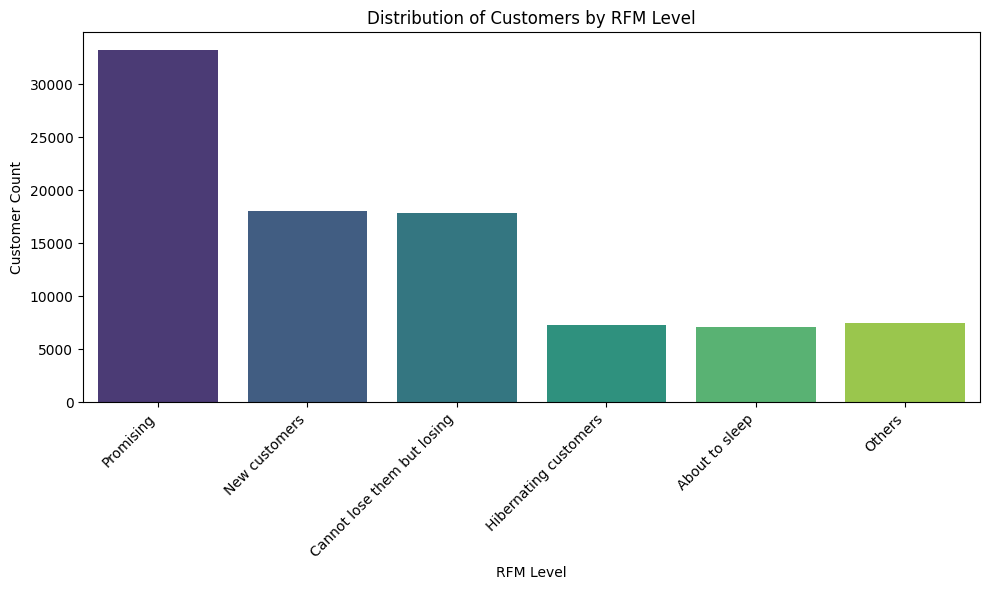

In [38]:
# Count the number of customers in each RFM level
rfm_level_counts = rfm_df['RFM_Level'].value_counts().reset_index()
rfm_level_counts.columns = ['RFM_Level', 'Customer_Count']

# Separate the 'Others' category
others_row = rfm_level_counts[rfm_level_counts['RFM_Level'] == 'Others'].copy()
rfm_level_counts = rfm_level_counts[rfm_level_counts['RFM_Level'] != 'Others']

# Sort the remaining categories by Customer_Count in descending order
rfm_level_counts = rfm_level_counts.sort_values(by='Customer_Count', ascending=False)

# Append the 'Others' row to the end
rfm_level_counts = pd.concat([rfm_level_counts, others_row])

# Create a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_level_counts, x='RFM_Level', y='Customer_Count', palette='viridis', hue='RFM_Level', legend=False)
plt.title('Distribution of Customers by RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart above illustrates customer segmentation based on RFM (Recency, Frequency, Monetary) scores. Here's what each segment represents:

- **Promising**  
  Recently active customers with decent spending but low frequency. They have high potential to become loyal if properly nurtured.

- **New Customers**  
  First-time buyers who have just joined the platform. These customers are still exploring and need onboarding or welcome offers.

- **Cannot Lose Them but Losing**  
  Previously loyal or high-value customers who have not made recent purchases. This group is at high risk of churn and needs urgent re-engagement.

- **Others**  
  Average customers with no strong behavioral patterns. They're not top priority but can be engaged with broad campaigns.

- **Hibernating Customers**  
  Customers who haven’t purchased for a long time and tend to spend less. These customers may require heavy discounts or incentives to re-activate.

- **About to Sleep**  
  Customers who are showing early signs of inactivity. Quick action can prevent them from becoming dormant.


#### Key Insights :

- The **largest customer segment** is **"Promising"**, suggesting a strong base of recently active customers with growth potential. These are ideal targets for upselling and loyalty-building strategies.
- A significant number of customers fall into **"Cannot Lose Them but Losing"**, which indicates a **churn risk** from formerly valuable customers. Win-back campaigns should prioritize this group.
- The presence of many **"New Customers"** shows healthy acquisition, but their **retention efforts must follow** to prevent quick churn.
- Segments like **"Hibernating"** and **"About to Sleep"** highlight customers who are likely to leave or already disengaged — consider reactivation offers, reminders, or exit surveys.

### **5.2 Business Overview**
We can start by analyzing data related to business operations as a whole.

Firstly, we may explore the trend of Olist sales overtime

In [39]:
EDA_df['order_purchase_timestamp'] = pd.to_datetime(EDA_df['order_purchase_timestamp'])
EDA_df['year_month'] = EDA_df['order_purchase_timestamp'].dt.to_period('M')

# Group by year and month and calculate total payment value
monthly_sales = EDA_df.groupby('year_month')['payment_value'].sum().reset_index()

monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)
display(monthly_sales.head())

year_month  payment_value
0    2016-10       61593.19
1    2016-12          19.62
2    2017-01      172882.76
3    2017-02      314200.34
4    2017-03      489953.98

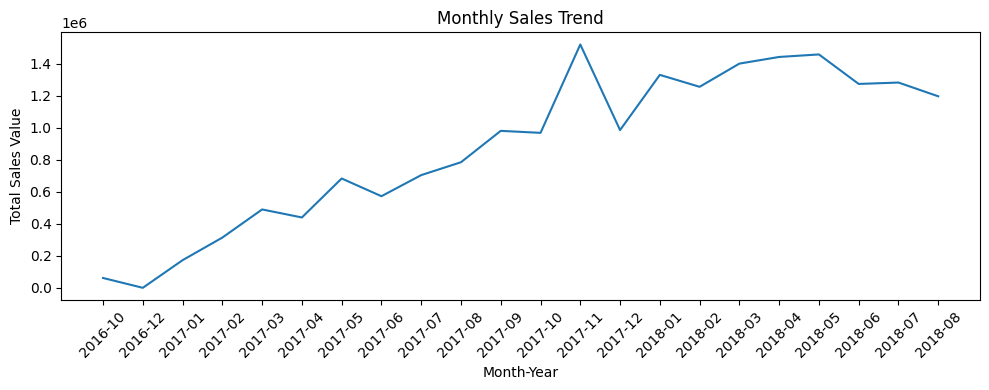

In [63]:
# Visualize the monthly trend of sales using a line chart
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_sales, x='year_month', y='payment_value')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line chart above displays the total sales value per month from late 2016 to mid-2018. The Y-axis values are in millions (1e6). Here's what we can observe:

- **Upward Growth**: There is a clear upward trend in sales throughout 2017, indicating strong business growth and increasing customer engagement.
- **Sales Peak**: The highest monthly sales occurred in **November 2017**, which may be influenced by major shopping events such as **Black Friday** or **holiday campaigns**.
- **Volatility in Late 2017**: After the November spike, there's a sharp decline in December, followed by a rebound in early 2018. This fluctuation may reflect seasonality or delivery capacity constraints during high-demand periods.
- **Stable Highs in 2018**: From February 2018 onwards, sales remained at a consistently high level, suggesting stable customer acquisition and repeat purchases.

Furthermore, we can check the top performing product categories in Olist

/tmp/ipython-input-1677272284.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


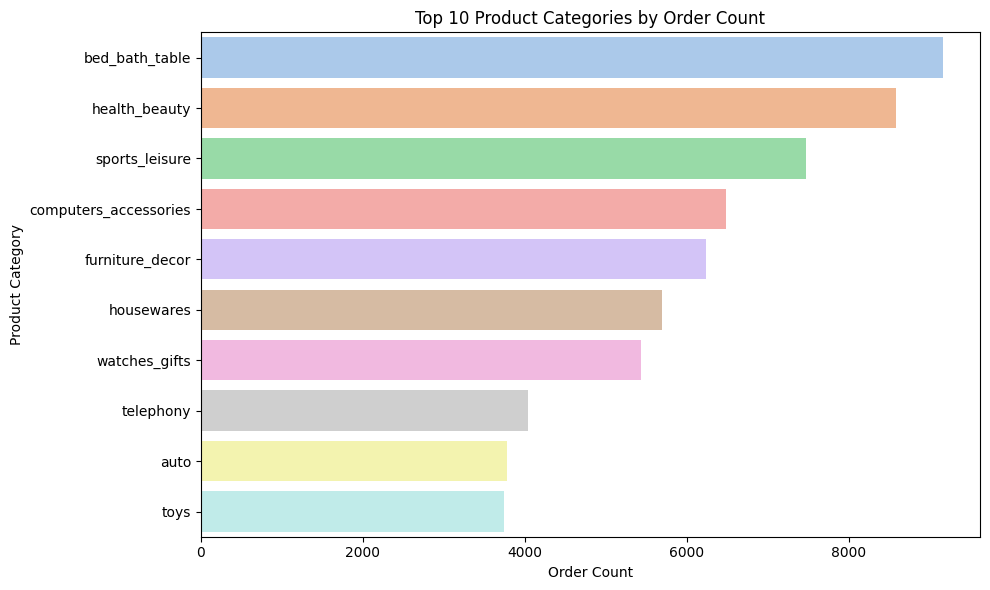

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique orders per category
product_category_counts = (
    EDA_df.groupby('product_category_name_english')['order_id']
    .nunique()
    .reset_index()
    .rename(columns={'order_id': 'order_count'})
    .sort_values(by='order_count', ascending=False)
)

top_10_categories = product_category_counts.head(10)

# Visualize with bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_categories,
    y='product_category_name_english',
    x='order_count',
    orient='h',
    palette='pastel'
)

plt.title('Top 10 Product Categories by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


The bar chart above highlights the most frequently purchased product categories on the platform. Here are the key takeaways:

- **bed_bath_table** is the most popular category, suggesting high and consistent demand for household essentials. This category is likely a key driver of repeat purchases and should be prioritized in stock availability, delivery speed, and promotional efforts.

- **health_beauty** and **sports_leisure** rank highly as well, reflecting strong customer interest in personal care and active lifestyle. These categories are good targets for personalized marketing, bundling, or seasonal promotions.

- The presence of **furniture_decor** and **computers_accessories** among the top categories indicates a healthy volume of high-value items, where customer satisfaction may depend heavily on delivery experience, packaging, and post-purchase service.

- Other categories like **housewares**, **watches_gifts**, and **telephony** show the platform’s ability to capture both everyday needs and special-occasion shopping behavior.

Lastly, we can also visualize the trend of review scores in Olist.

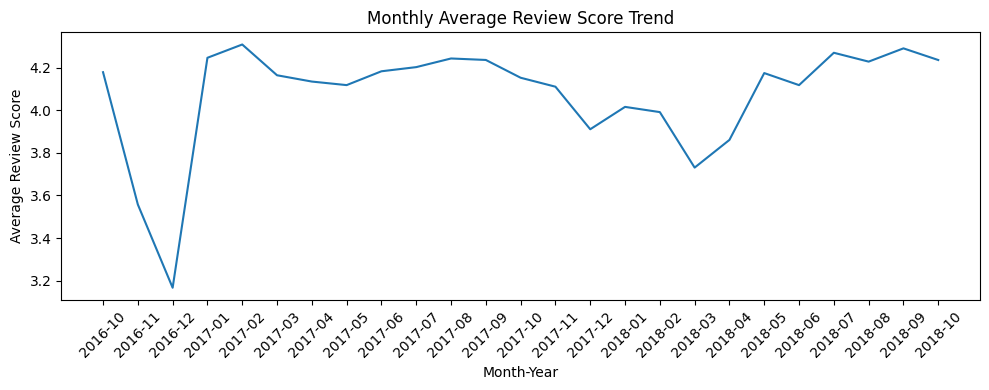

In [42]:
# Ensure 'order_purchase_timestamp' is datetime and extract year and month
EDA_df['review_answer_timestamp'] = pd.to_datetime(EDA_df['review_answer_timestamp'])
EDA_df['year_month_review'] = EDA_df['review_answer_timestamp'].dt.to_period('M')

# Group by year and month and calculate the average review score
monthly_avg_review_score = EDA_df.groupby('year_month_review')['review_score'].mean().reset_index()

monthly_avg_review_score['year_month_review'] = monthly_avg_review_score['year_month_review'].astype(str)

# Visualize with line chart
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_avg_review_score, x='year_month_review', y='review_score')
plt.title('Monthly Average Review Score Trend')
plt.xlabel('Month-Year')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the chart, we can see that out of all recorded reviews, the review scores in Olist do not trend upwards. It reached a slump in December 2016, and fluctuates for the majority of the duration. This suggests that there are pain points that still affects customer satisfaction when purchasing from Olist.

### **5.3 Review Score Breakdown by Category, Delivery, and Payment**

This section explores how customer review scores are distributed and influenced by key transaction attributes — including product category, delivery experience, and payment behavior.

By analyzing the breakdown of review scores across top product categories, delivery durations, and payment values, we aim to identify patterns that reveal customer satisfaction drivers and pain points.


Following the business overview and customer segmentation, this section focuses on analyzing **customer experience**, using review scores as a key indicator of satisfaction.

#### **Distribution of Review Scores for Top 10 Product Categories by Order**

This analysis shows how customer satisfaction varies across the top 5 product categories by visualizing the percentage of review scores from 1 to 5. The goal is to identify which categories tend to receive more negative feedback and which ones consistently meet customer expectations.


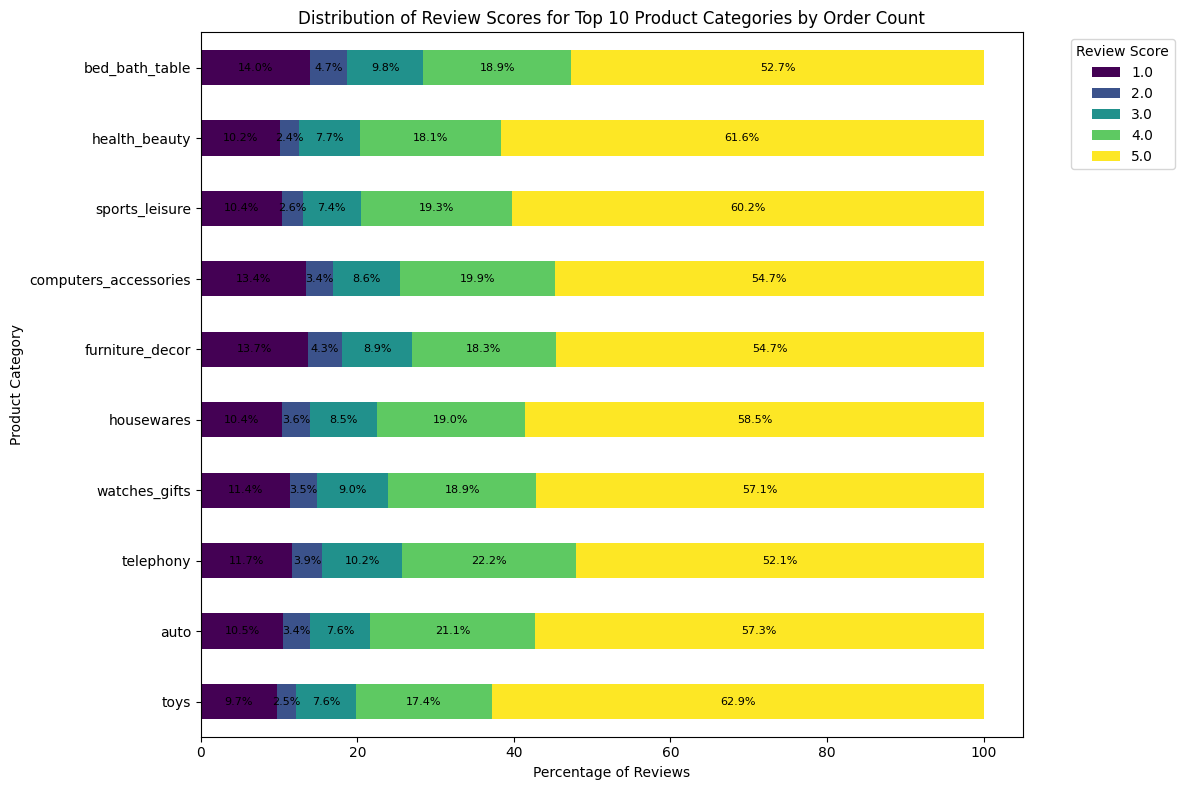

In [43]:
top_10_categories_sorted = (
    EDA_df.groupby('product_category_name_english')['order_id']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .sort_values(ascending=True)  # Sort to show descending order
    .index.tolist()
)

top_categories_df = EDA_df[EDA_df['product_category_name_english'].isin(top_10_categories_sorted)].copy()

review_score_counts = (
    top_categories_df
    .groupby('product_category_name_english')['review_score']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name='percentage')
)

review_score_pivot = review_score_counts.pivot(
    index='product_category_name_english',
    columns='review_score',
    values='percentage'
).fillna(0)

review_score_pivot = review_score_pivot.reindex(top_10_categories_sorted)

ax = review_score_pivot.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis'
)

plt.title('Distribution of Review Scores for Top 10 Product Categories by Order Count')
plt.xlabel('Percentage of Reviews')
plt.ylabel('Product Category')
plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels
for c in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_width()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

plt.show()


The chart shows the distribution of review scores across the top 5 product categories. While most reviews are positive (score 5), there are key differences worth noting:

- **health_beauty** and **sports_leisure** have the highest proportion of 5-star reviews (60%+), indicating strong customer satisfaction in these categories.
- In contrast, **bed_bath_table**, **furniture_decor**, and **computers_accessories** show higher percentages of 1-star reviews (13–14%), suggesting potential issues in product quality, expectations, or delivery performance.

#### **Average Delivery Duration by Review Score**
Firstly, we can visualize the average delivery duration for each review rating to check for correlations between the two variables.

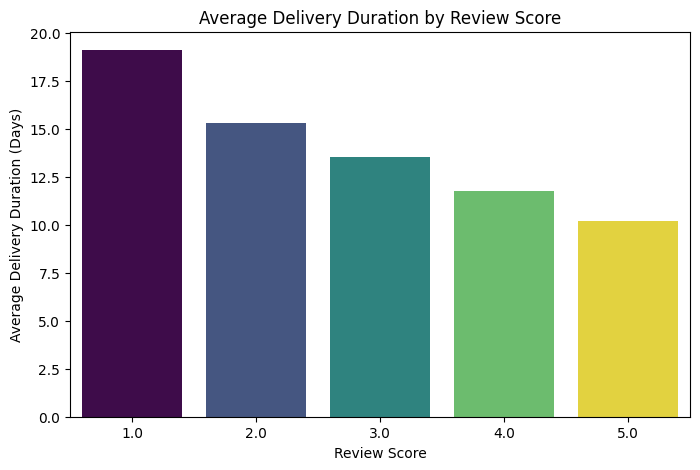

In [44]:
average_delivery_duration = EDA_df.groupby('review_score')['delivery_duration_days'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_delivery_duration, x='review_score', y='delivery_duration_days', palette='viridis', hue='review_score', legend=False)
plt.title('Average Delivery Duration by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Duration (Days)')
plt.show()

From the chart above, we can see that the higher the review score, the faster the average delivery date.

#### **Average Payment Value by Review Score**

Next we can compare payment amount and review scores to examine whether there is a correlation between purchase value and ratings.

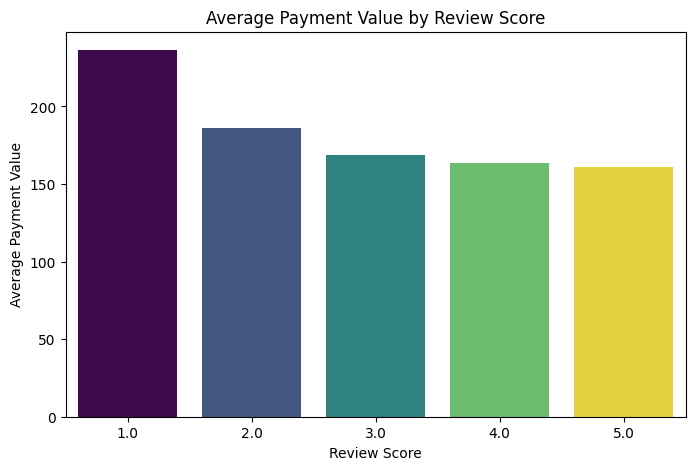

In [45]:
# Calculate the average payment value for each review score
average_payment_value = transformed_df.groupby('review_score')['payment_value'].mean().reset_index()

# Create a bar chart to visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=average_payment_value, x='review_score', y='payment_value', palette='viridis', hue='review_score', legend=False)
plt.title('Average Payment Value by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Payment Value')
plt.show()

From the chart above, we can see that low review scores tend to have higher payment values on average. This may show that customers who pay higher sums are more sensitive to the quality in products or services provided by the seller.

### **5.4 Payment Methods**
This section explores how customers pay for their orders and whether certain payment methods are associated with higher transaction values. Understanding payment preferences can help optimize checkout experiences and tailor promotions accordingly.

#### **Distributions of Payment Method**

Firstly, we can visualize how frequent each payment method is used.

In [46]:
# Calculate the distribution of payment types
payment_type_counts = EDA_df['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['payment_type', 'count']
payment_type_counts['percentage'] = (payment_type_counts['count'] / payment_type_counts['count'].sum()) * 100

display(payment_type_counts)

payment_type  count  percentage
0  credit_card  83097   73.774159
1       boleto  21920   19.460746
2      voucher   6002    5.328622
3   debit_card   1618    1.436473

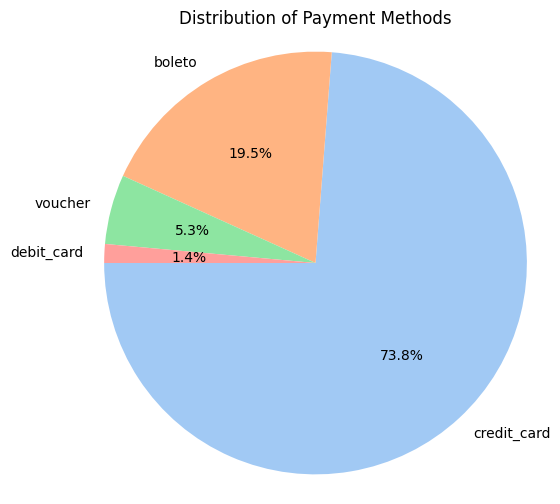

In [47]:
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_type_counts['percentage'], labels=payment_type_counts['payment_type'], autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'), textprops={'fontsize': 10})
plt.title('Distribution of Payment Methods', fontsize=12)
plt.axis('equal')
plt.show()

From the pie chart above, we can observe the distribution of various payment methods used by customers. This analysis helps identify user preferences in completing transactions.

- **Credit card** is the dominant payment method, used in **73.8%** of transactions.
- **Boleto** follows with **19.5%**, showing strong adoption especially in local Brazilian contexts.
- **Voucher** and **debit card** are significantly less preferred, accounting for only **5.3%** and **1.4%** respectively.

These insights suggest that enhancing the experience for credit card and boleto users could drive better transaction rates and reduce cart abandonment.

#### **Average Payment Value by Payment Type**
Next, we can analyze the relationship between payment methods and payment value to see if certain payment types are associated with higher or lower purchase amounts.

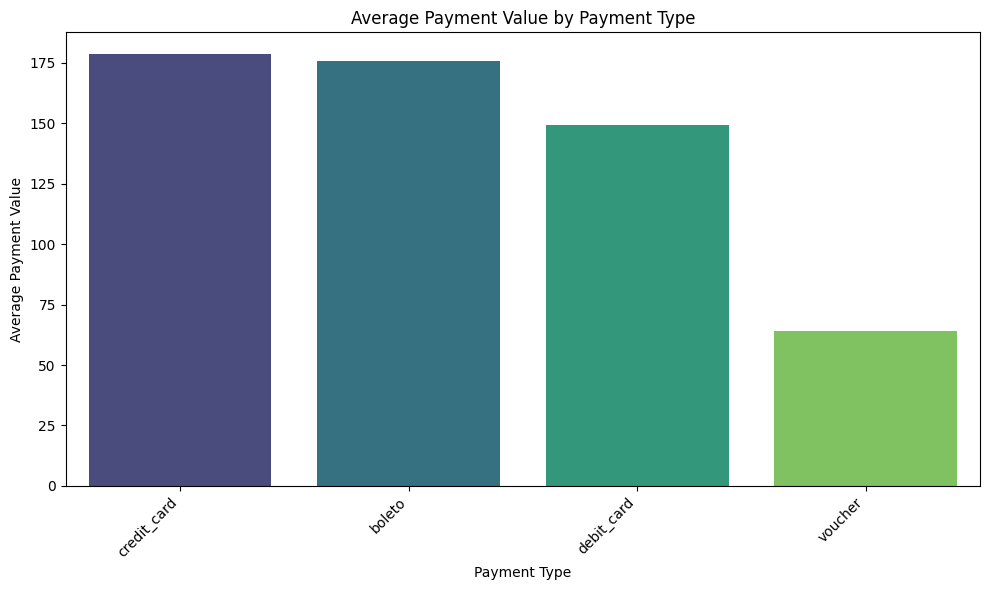

In [48]:
# Calculate the average payment value for each payment type
average_payment_by_type = EDA_df.groupby('payment_type')['payment_value'].mean().reset_index()
average_payment_by_type = average_payment_by_type.sort_values(by='payment_value', ascending=False)

# Visualize with bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=average_payment_by_type, x='payment_type', y='payment_value', palette='viridis', hue='payment_type', legend=False)
plt.title('Average Payment Value by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Payment Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the chart above, we can see that digital payments have the highest payment values on average, with credit cards being used the most often in high-value transactions. Vouchers are associated with low-value payments which may be related to its relatively low monetary value.

#### **Distribution of Payments By Installments**
Lastly, we can explore the sales of orders of customers with or without instalments when paying for products in Olist.

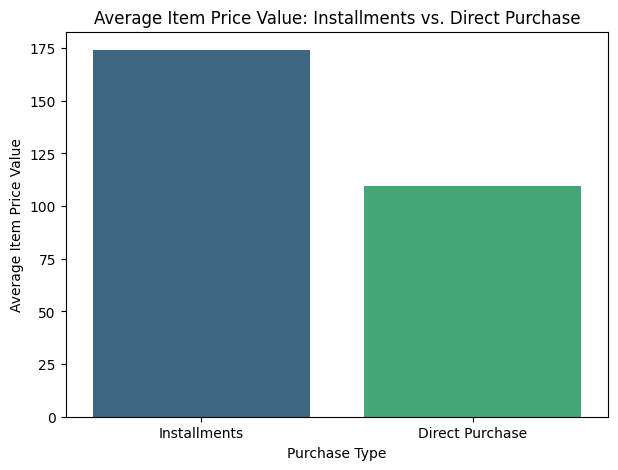

In [49]:
# Separate orders with installments from direct purchases
installments_df = transformed_df[transformed_df['payment_installments'] > 1].copy()
direct_purchase_df = transformed_df[transformed_df['payment_installments'] == 1].copy()

# Calculate the average payment value excluding freight for each group
installments_order_price = installments_df.groupby('order_id')['price'].sum().mean()
direct_purchase_order_price = direct_purchase_df.groupby('order_id')['price'].sum().mean()

average_sales_comparison_no_freight = pd.DataFrame({
    'Purchase Type': ['Installments', 'Direct Purchase'],
    'Average Item Price Value': [installments_order_price, direct_purchase_order_price]
})

# Visualize using bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=average_sales_comparison_no_freight, x='Purchase Type', y='Average Item Price Value', palette='viridis', hue='Purchase Type', legend=False)
plt.title('Average Item Price Value: Installments vs. Direct Purchase')
plt.xlabel('Purchase Type')
plt.ylabel('Average Item Price Value')
plt.show()

In [50]:
# Count the number of unique orders with installments (payment_installments > 1)
orders_with_installments_count = transformed_df[transformed_df['payment_installments'] > 1]['order_id'].nunique()

# Count the number of unique orders without installments (payment_installments == 1)
orders_without_installments_count = transformed_df[transformed_df['payment_installments'] == 1]['order_id'].nunique()

# Create a DataFrame to display the counts
installment_counts_df = pd.DataFrame({
    'Installment Status': ['With Installments', 'Without Installments'],
    'Number of Orders': [orders_with_installments_count, orders_without_installments_count]
})

# Show the percentages
total_orders = installment_counts_df['Number of Orders'].sum()
installment_counts_df['Percentage (%)'] = (installment_counts_df['Number of Orders'] / total_orders) * 100

display(installment_counts_df)

Installment Status  Number of Orders  Percentage (%)
0     With Installments             48397       51.081324
1  Without Installments             46348       48.918676

The information above suggests that purchases with instalments have higher payment values compared to direct purchases. The number of orders with and without instalments is also similar.

### **5.5 Seller Performance Analysis**
This section focuses on analyzing seller performance based on total sales, with a particular emphasis on the top-performing sellers.

By identifying the top 10% of sellers by total sales, we aim to understand their contribution to the platform’s overall revenue, the product categories they dominate, and their geographical distribution. These insights help uncover seller dynamics that drive marketplace performance and can support strategic decisions in seller management, partnership prioritization, and regional expansion.


#### **Number of sellers in the top 10% by total sales**

Firstly, we can identify the top 10% sellers based on their total sales. We choose this metric as it quantifies success by the amount of sales earned. A seller can have perfect 5.0 ratings but not much sales, which is why review scores are not used as the metric.

In [51]:
# Calculate total sales for each seller
seller_sales = EDA_df.groupby('seller_id')['price'].sum().reset_index()
seller_sales.rename(columns={'price': 'total_sales'}, inplace=True)

# Calculate top 10% of sellers
top_10_percent_threshold = seller_sales['total_sales'].quantile(0.9)

# Filter to include only the top 10% sellers by total sales
top_sellers_by_sales = seller_sales[seller_sales['total_sales'] >= top_10_percent_threshold].sort_values(by='total_sales', ascending=False)

# Merge top sellers by sales with review scores
top_sellers_reviews = pd.merge(top_sellers_by_sales, EDA_df[['seller_id', 'review_score']], on='seller_id', how='left')

# Calculate the average review score for each of the top sellers
average_review_score_by_top_seller = top_sellers_reviews.groupby('seller_id').agg({
    'total_sales': 'first',
    'review_score': 'mean'
}).reset_index()

# Sort by total sales to get the top 10
top_10_sellers_with_reviews = average_review_score_by_top_seller.sort_values(by='total_sales', ascending=False).head(10)
display(top_10_sellers_with_reviews)

seller_id  total_sales  review_score
88   53243585a1d6dc2643021fd1853d8905    235937.94      4.111639
78   4869f7a5dfa277a7dca6462dcf3b52b2    233810.94      4.122327
79   4a3ca9315b744ce9f8e9374361493884    209682.37      3.823529
284  fa1c13f2614d7b5c4749cbc52fecda94    197838.53      4.385787
141  7c67e1448b00f6e969d365cea6b010ab    196389.54      3.401526
145  7e93a43ef30c4f03f38b393420bc753a    170792.81      4.357576
250  da8622b14eb17ae2831f4ac5b9dab84a    170005.97      4.074636
136  7a67c85e85bb2ce8582c35f2203ad736    147021.09      4.261728
25   1025f0e2d44d7041d6cf58b6550e0bfa    141217.99      3.876637
171  955fee9216a65b617aa5c0531780ce60    132472.32      4.090054

#### **Top Product Categories from Top 10% Sellers by Sales**

From these top-performing sellers, we can visualize their most popular products.

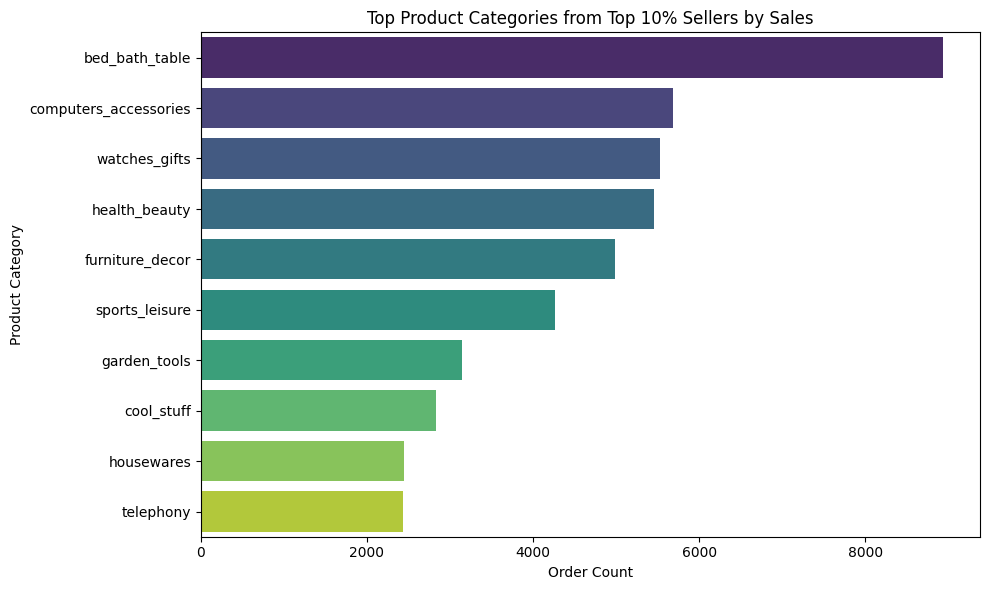

In [52]:
# Filter to include only orders from the top 10% sellers by sales
top_sellers_sales_orders_df = transformed_df[transformed_df['seller_id'].isin(top_sellers_by_sales['seller_id'])]

# Calculate the count of each product category for these sellers
top_sellers_category_counts = top_sellers_sales_orders_df['product_category_name_english'].value_counts().reset_index()
top_sellers_category_counts.columns = ['product_category_name_english', 'order_count']

top_n_categories_sellers = top_sellers_category_counts.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_n_categories_sellers, y='product_category_name_english', x='order_count', orient='h', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Top Product Categories from Top 10% Sellers by Sales')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

This chart presents the top product categories sold by the top 10% of sellers based on total sales. It highlights which product categories are most frequently sold by high-performing sellers, offering insights into market demand and sales focus.

- **bed_bath_table** is the most sold category among top sellers, significantly ahead of others.
- **computers_accessories**, **watches_gifts**, and **health_beauty** also show strong sales, indicating high consumer demand.
- Product focus in these categories can be a key driver for sellers aiming to increase sales performance.


#### **Top 10 States with the Most Top 10% Sellers by Total Sales**

We may also gain insight regarding where these top-sellers are based from.

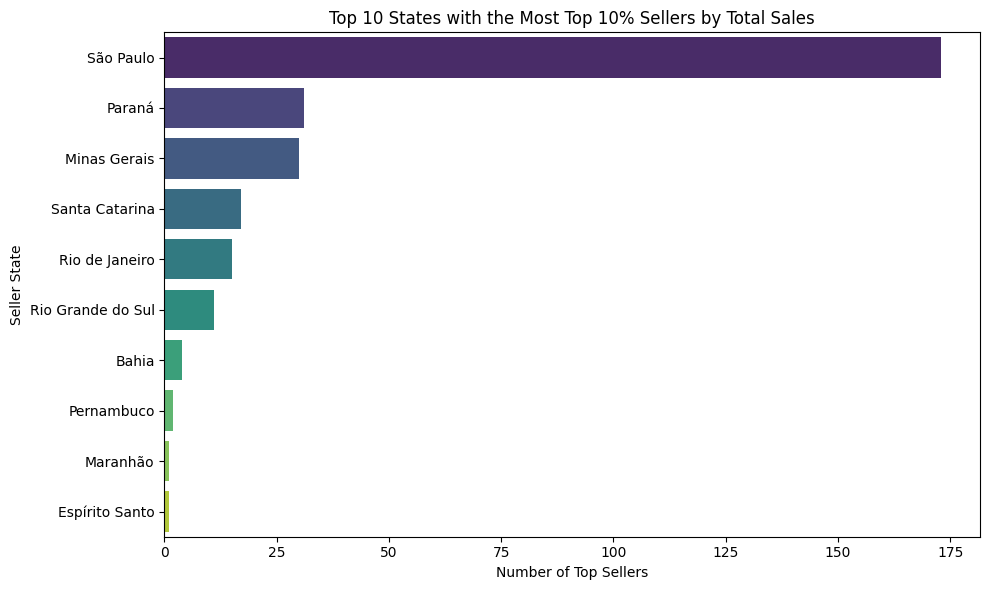

In [53]:
# Merge top sellers by sales with seller state information
top_sellers_sales_with_state = pd.merge(top_sellers_by_sales, transformed_df[['seller_id', 'seller_state_name']], on='seller_id', how='left').drop_duplicates(subset=['seller_id'])

# Count the number of top sellers
top_sellers_sales_by_state = top_sellers_sales_with_state['seller_state_name'].value_counts().reset_index()
top_sellers_sales_by_state.columns = ['seller_state_name', 'top_seller_count']

top_n_states_sales = top_sellers_sales_by_state.head(10)

# Create a bar chart to visualize the distribution of top sellers by state
plt.figure(figsize=(10, 6))
sns.barplot(data=top_n_states_sales, x='top_seller_count', y='seller_state_name', orient='h', palette='viridis', hue='seller_state_name', legend=False)
plt.title('Top 10 States with the Most Top 10% Sellers by Total Sales')
plt.xlabel('Number of Top Sellers')
plt.ylabel('Seller State')
plt.tight_layout()
plt.show()

From the chart above, we gain insight that most top-sellers are from Sao Paulo. In this way, seller-related events can take this into account when considering a location.

#### **Top Product Categories from Top 10% Sellers in São Paulo by Sales**

Now we can have a look at the most popular products sold by sellers in Sao Paulo.

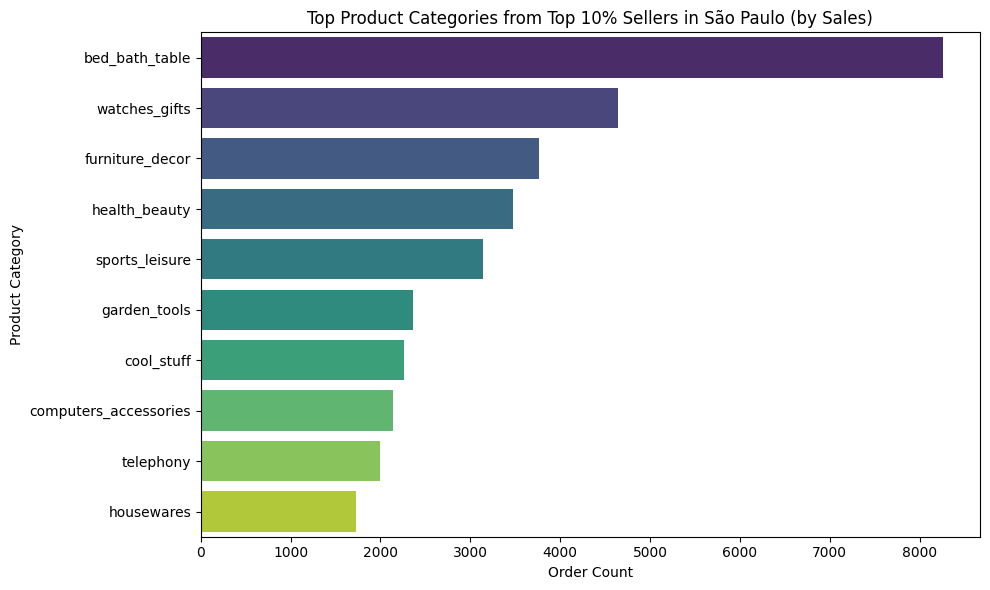

In [54]:
# Filter to include only Sao Paulo
top_sellers_sp_orders_df = top_sellers_sales_orders_df[top_sellers_sales_orders_df['seller_state_name'] == 'São Paulo']

# Count each product category for these sellers
top_sellers_sp_category_counts = top_sellers_sp_orders_df['product_category_name_english'].value_counts().reset_index()
top_sellers_sp_category_counts.columns = ['product_category_name_english', 'order_count']

top_n_categories_sp_sellers = top_sellers_sp_category_counts.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_n_categories_sp_sellers, y='product_category_name_english', x='order_count', orient='h', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Top Product Categories from Top 10% Sellers in São Paulo (by Sales)')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

This chart shows the most popular product categories among the top 10% sellers specifically in São Paulo, based on order volume.

- **bed_bath_table** leads by a large margin, indicating strong consumer demand in this category.
- **watches_gifts**, **furniture_decor**, and **health_beauty** also perform well, suggesting opportunities for sellers targeting lifestyle and personal care segments.
- Compared to the overall top 10% seller chart, **computers_accessories** ranks lower here, showing different regional preferences in São Paulo.


### **5.6 Product Understanding**

This section focuses on analyzing product performance based on total sales, and its distribution within Olist. By understanding the distribution of products across different categories, we can understand which products are performing well, if there are seasonal trends among products,

Firstly, we can identify the top-selling product categories.

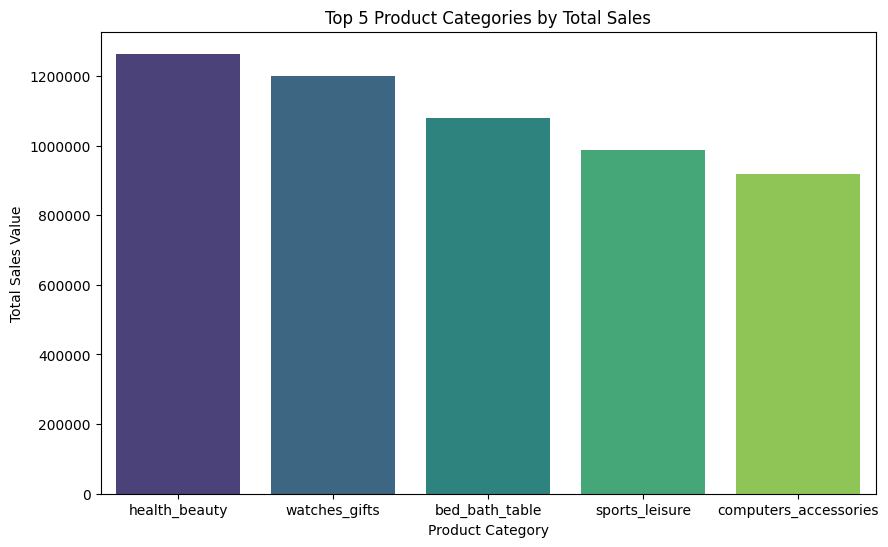

In [55]:
# Calculate total sales for each product category
category_sales = EDA_df.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales.rename(columns={'price': 'total_sales'}, inplace=True)

# Sort by total sales in descending order and select the top 5
top_5_categories_by_sales = category_sales.sort_values(by='total_sales', ascending=False).head(5)

# Visualize with bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_categories_by_sales, x='product_category_name_english', y='total_sales', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Top 5 Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')

# Format the y-axis
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)


plt.show()

From the total sales, it appears that health and beauty products are the most popular among customers in Brazil, followed by accessories, homewares, and sports equipments.

Next, we can visualize the sales trend overtime for these categories.

In [56]:
# Filter the DataFrame to include only the top 5 categories by sales
top_5_categories_list = top_5_categories_by_sales['product_category_name_english'].tolist()
top_categories_sales_trend_df = EDA_df[EDA_df['product_category_name_english'].isin(top_5_categories_list)].copy()

# Ensure 'order_purchase_timestamp' is datetime and extract year and month
top_categories_sales_trend_df['order_purchase_timestamp'] = pd.to_datetime(top_categories_sales_trend_df['order_purchase_timestamp'])
top_categories_sales_trend_df['year_month'] = top_categories_sales_trend_df['order_purchase_timestamp'].dt.to_period('M')

# Group by year, month, and product category and calculate total sales
monthly_category_sales = top_categories_sales_trend_df.groupby(['year_month', 'product_category_name_english'])['price'].sum().reset_index()

# Convert 'year_month' back to string for plotting
monthly_category_sales['year_month'] = monthly_category_sales['year_month'].astype(str)

display(monthly_category_sales.head())

year_month product_category_name_english    price
0    2016-10                bed_bath_table   478.99
1    2016-10         computers_accessories   842.92
2    2016-10                 health_beauty  3608.95
3    2016-10                sports_leisure  2033.65
4    2016-10                 watches_gifts  2711.07

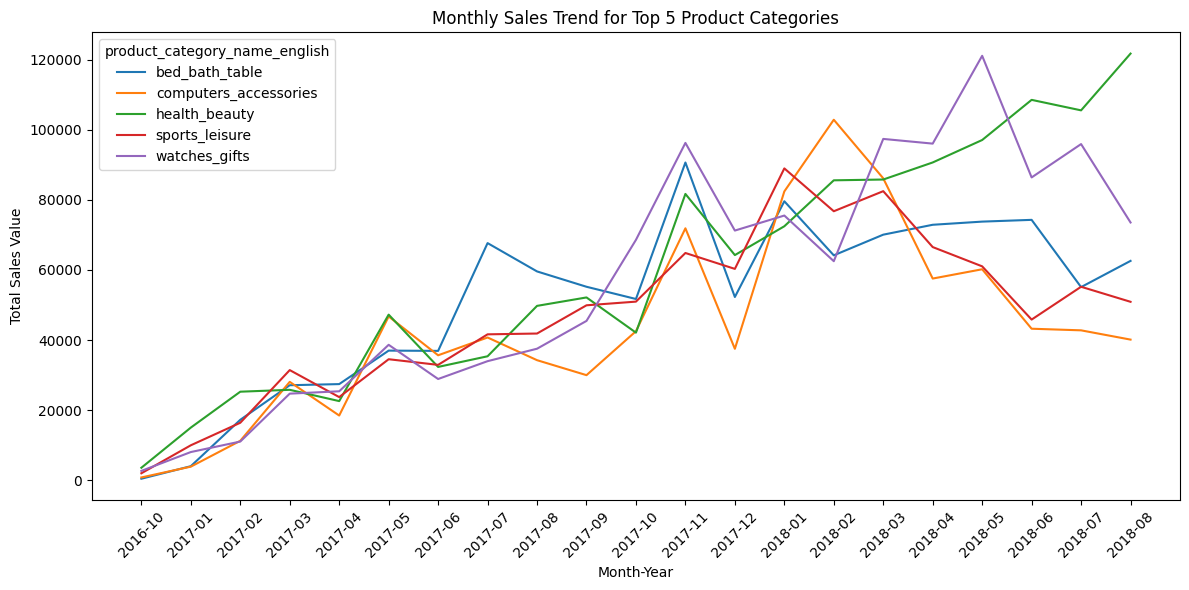

In [57]:
# Create a line chart with multiple lines to visualize the monthly sales trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_category_sales, x='year_month', y='price', hue='product_category_name_english')
plt.title('Monthly Sales Trend for Top 5 Product Categories')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In terms of demand, the top 5 product categories seem to show an upwards trend, with fluctuating demand. Health and beauty products seem to be the only product consistently rising in demand, while others follow a downwards trend from 2018 onwards.

From the analysis in the previous section, we know that São Paulo is the state with the highest number of top sellers. It is possible to gain more insight about the kind of products sold in that state.

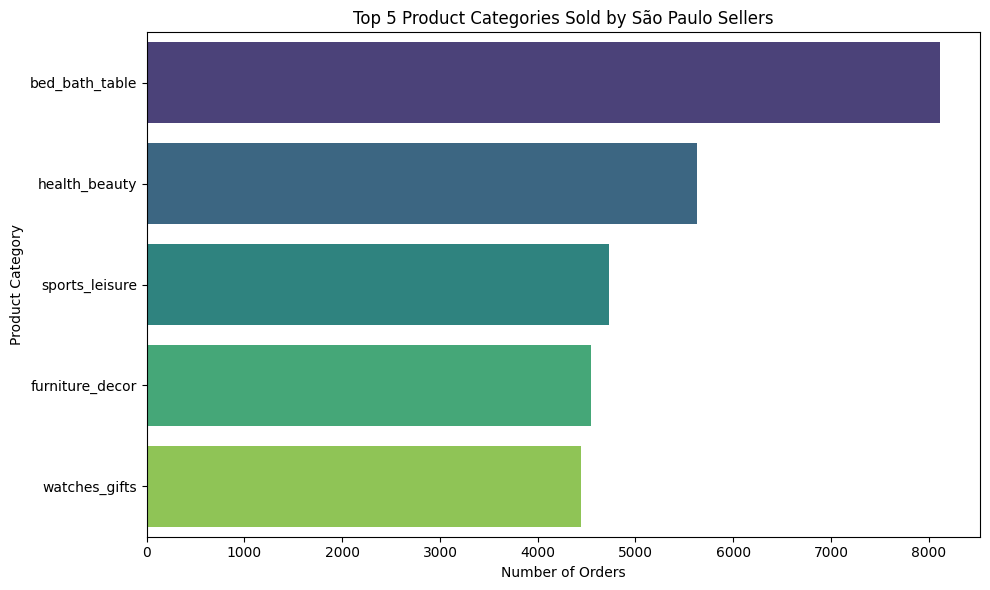

In [58]:
# Filter the DataFrame to include only orders from Sao Paulo sellers
sp_sellers_df = transformed_df[transformed_df['seller_state_name'] == 'São Paulo'].copy()

# Count the number of unique orders for each product category sold by Sao Paulo sellers
sp_category_counts = sp_sellers_df.groupby('product_category_name_english')['order_id'].nunique().reset_index()
sp_category_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# Sort by order count in descending order and select the top 5
top_5_sp_categories = sp_category_counts.sort_values(by='order_count', ascending=False).head(5)

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_sp_categories, x='order_count', y='product_category_name_english', orient='h', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Top 5 Product Categories Sold by São Paulo Sellers')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

From the bar chart above, we can see that homewares, beauty products, and sport products are among the most popular items in São Paulo. In this way, campaigns and promotions in this state can focus on the product categories in the chart as they attract the highest demand.

On the other hand, we can also identify slow-moving categories within Olist.

Text(0, 0.5, 'Total Sales Value')

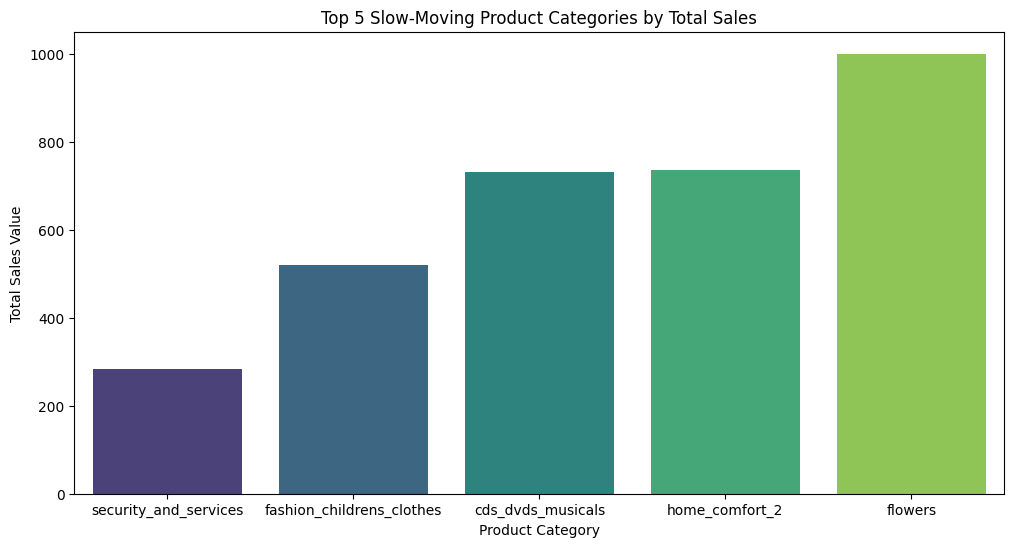

In [59]:
# Calculate total sales for each product category
category_sales = EDA_df.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales.rename(columns={'price': 'total_sales'}, inplace=True)

# Sort by total sales in ascending order and display the bottom categories
bottom_categories_by_sales = category_sales.sort_values(by='total_sales', ascending=True).head(5)

# Visualize with bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_categories_by_sales, x='product_category_name_english', y='total_sales', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Top 5 Slow-Moving Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')

The above chart shows the least bought or slow-moving products within Olist. They don't generate much revenue in general.

Although these are slow-moving products, we can try to visualize and determine whether there is seasonal demand for these products.

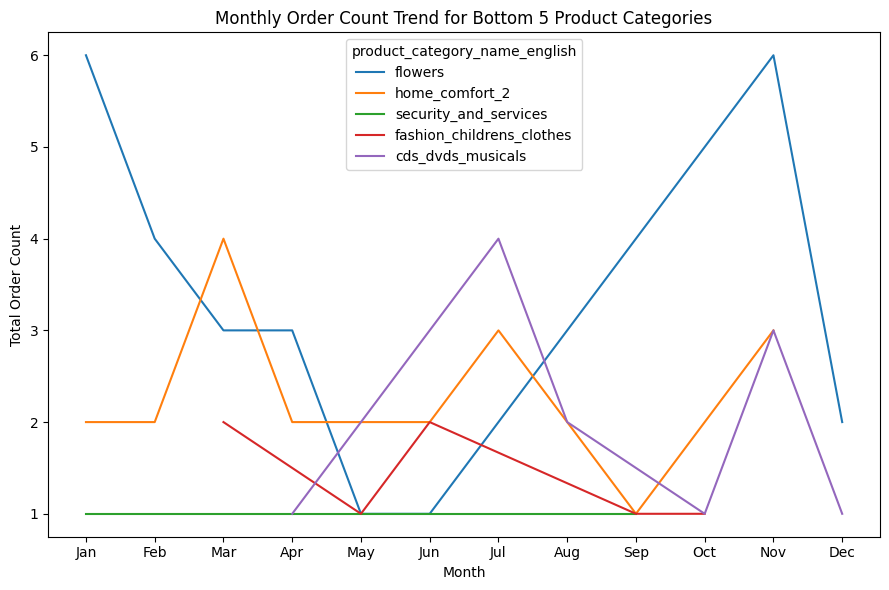

In [60]:
# Get the list of the bottom 5 product categories by sales
bottom_5_categories_list = bottom_categories_by_sales['product_category_name_english'].head(5).tolist()

# Filter the DataFrame to include only the bottom 5 categories
bottom_categories_sales_trend_df = EDA_df[EDA_df['product_category_name_english'].isin(bottom_5_categories_list)].copy()

# Ensure 'order_purchase_timestamp' is datetime and extract the month
bottom_categories_sales_trend_df['order_purchase_timestamp'] = pd.to_datetime(bottom_categories_sales_trend_df['order_purchase_timestamp'])
bottom_categories_sales_trend_df['month'] = bottom_categories_sales_trend_df['order_purchase_timestamp'].dt.month

# Group by month and product category and calculate total sales
monthly_bottom_category_sales = bottom_categories_sales_trend_df.groupby(['month', 'product_category_name_english'])['order_id'].nunique().reset_index()
monthly_bottom_category_sales.rename(columns={'order_id': 'order_count'}, inplace=True)

# Create a line chart to visualize the monthly sales trend for the bottom 5 product categories
plt.figure(figsize=(9, 6))
sns.lineplot(data=monthly_bottom_category_sales, x='month', y='order_count', hue='product_category_name_english')
plt.title('Monthly Order Count Trend for Bottom 5 Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Order Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

From the chart above, there is a spike in sales for flowers near the end of the year, which shows a seasonal demand during that period. However, there is only a handful of orders for the 5 least performing categories, and therefore campaigns related to pushing the sales of these categories might not yield bountiful results.

Lastly, we can visualize the price distribution for the least popular categories. This might provide insight into whether price is a barrier to entry for these items.

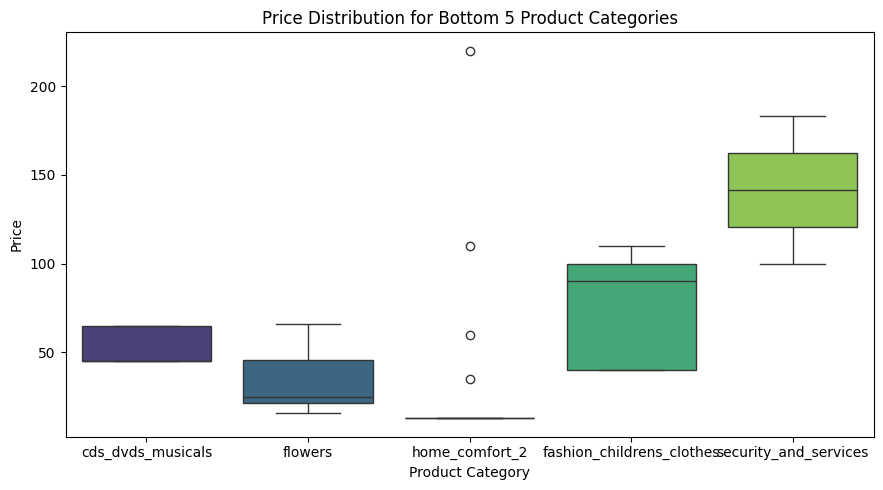

In [61]:
# Get the list of the bottom 5 product categories by sales
bottom_5_categories_list = bottom_categories_by_sales['product_category_name_english'].head(5).tolist()

# Filter the DataFrame to include only the bottom 5 categories
bottom_categories_df = transformed_df[transformed_df['product_category_name_english'].isin(bottom_5_categories_list)].copy()

# Create box plots to visualize the price distribution for each of the bottom 5 categories
plt.figure(figsize=(9, 5))
sns.boxplot(data=bottom_categories_df, x='product_category_name_english', y='price', palette='viridis', hue='product_category_name_english', legend=False)
plt.title('Price Distribution for Bottom 5 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()

From the chart above, it seems that home comfort and security devices are slow-moving products with relatively higher price than the others. However, the highest price is only 200, assuming it uses Brazilian Real. In this way, it seems unlikely that price is a barrier to entry for these products.

## **6. Conclusion and Recommendations**

After the final dataset have been created, we can start the analysis and visualization to gain insight which may help Olist to improve operations.

### **6.1 Customer Retention Strategy**

Regarding the insight gained from the customer segmentation analysis, some insights and recommendations can be considered:

- Conclusion:
  - Most customers are in the **“Promising”** and **“New Customers”** groups. They have **high potential** to become loyal buyers if managed well.
  
  - Many customers are starting to become **inactive**. This shows the risk of **churning customers** if no action is taken.

- Recommendations:
  - **Take care of high potential customers**: Provide additional **discounts, rewards, or special offers** to "Promising" and "New Customer" segments. "New customers" can be given exclusive vouchers when using the platform for the first time, while "Promising" customers can be eligible for rewards such as birthday discounts to promote higher buying frequency.

  - **Prevent customer churn**": Give **reminders or promo codes** to incentivise said customers to use the platform.

Doing this can help increase **customer loyalty** and **sales in the long term**.

**Limitations:**

- We don’t know why some customers stop buying.  
- There is no data about what products or services they prefer.  
- We cannot measure yet if the actions will really work without further testing.


### **6.2 Customer Review Improvement Strategy**

Regarding the insight gained from the reviews of products within Olist and other variables in the data, some insights and recommendations can be considered:

- Conclusion:
  - **Longer** delivery times correlate with **lower** review scores.
  - High payment values are linked to lower reviews. Mistakes in high-value purchases are more likely to result in low reviews.
  - Categories like *bed_bath_table* and *computers_accessories* have lower ratings.

- Recommendations:
  - **Optimize delivery speed:** Introducing faster shipping options, real-time tracking, and route optimization can help increase customer satisfaction.

  - **Prioritize high-value orders:** Olist can offer premium services (e.g., faster delivery or special handling) for these orders to reduce dissatisfaction.

  - **Enhance product quality for low-rated categories:** Olist can improve vendor quality checks or provide better product descriptions.

By implementing these actions, Olist can improve customer ratings, enhance loyalty, and increase repeat purchases.

**Limitations:**
- It needs to be acknowledged that this project does not go further into analyzing the contents of the reviews themselves, such as performing NLP to find the common complaint of a certain product category.
- Furthermore, data regarding the couriers used are not present within the data used.
- Lastly, individual product data is obscured, and therefore identifying individual products to be reviewed is difficult to perform with the current dataset.


### **6.3 Payment Strategy**

Regarding the insight gained from the trend and distribution of payment methods within Olist, some insights and recommendations can be considered:

- Conclusion:
  - Credit cards are used by **73.8% of customers** and show the **highest average payment value**.
  - Customers who choose **installments** tend to make **higher-value purchases** compared to direct buyers.
  - Boleto, voucher, and debit cards have a smaller proportion compared to credit cards, but provide alternative payment methods.

- Recommendations:
  - **Focus on credit card users:** Encourage credit card users to spend more through exclusive promotions, cashback, or loyalty benefits. One approach is to establish partnerships with specific banks or payment processors to ensure that credit card users are eligible for benefits, such as 0% interest payments during the initial seven months.

  - **Promote instalment payment options:** Offering flexible instalment plans (e.g., 0% interest, special bundles) can drive up average order value.
  
  - **Support other payment types (boleto, voucher, debit):** Improvements like clear payment instructions (for boleto), discount vouchers, or digital wallet options can enhance usability and reduce friction.

By implementing these actions, Olist can maximize revenue, increase customer satisfaction, and encourage higher-value transactions.

**Limitations:**


- The financial reliability of users and risks of failed payments or fraud are not captured in this analysis.
- No historical trend data is available to observe shifting customer preferences in payment methods.


### **6.4 Seller Performance**

Regarding the insight gained from the performance of the most successful sellers within Olist, some insights and recommendations can be considered:

- Conclusion:
  - There is a disparity between the number of high-performing and low-performing sellers.   
  - Olist's top sellers mainly specialize in specific categories instead of selling a broad range of products.
  - Categories such as *bed_bath_table*, *computers_accessories*, and *watches_gifts* appear as top performers among top 10% sellers.
  - São Paulo contributes the **highest number of top sellers** out of all regions.

- Recommendations:
  - **Strengthen top seller management:**  
  To maximize top-seller value, Olist should:
    - Offer **exclusive benefits** like lower commissions or promotion slots.  
    - Introduce **tiered recognition** (Gold/Silver/Bronze) based on performance.  
    - Monitor **high-sales, low-rating sellers** and offer guidance or support.  
    - Encourage **peer learning** by involving top sellers as mentors.  

  - **Encourage category expansion:** To increase sales in other categories, these sellers can be incentivised to sell products in adjacent categories, such as furniture into kitchenware

  - **Capitalize on high-performing product categories:**  
  Categories such as *bed_bath_table*, *computers_accessories*, and *watches_gifts* can be prioritized for campaigns, bundling, and marketing promotions to boost sales.

  - **Leverage seller strength in São Paulo:** Olist can focus logistics, marketing, and partnerships in this area to support growth and improve fulfillment.

By applying these strategies, Olist can increase order volume, improve efficiency, and drive sustainable growth.


**Limitations:**
- The dataset does not include metrics such as inventory levels, or order fulfillment capacity, which may influence whether a seller can scale to other categories or handle larger volumes.
- Furthermore, the insight gained has a bias towards the Sao Paulo area, and the solution provided might not generalise to other regions.


### **6.5 Product Optimisation**

Regarding the insight gained from the relationship between payment methods and other variables in the data, some insights and recommendations can be considered:

- Conclusion:
  - The sales trend of high-performing products in Olist follows a fluctuating but upward trend.
  - Overall, health and beauty products are among the most popular products in Olist's catalogue.
  - There are slow-moving products with seasonal demand in Olist.

- Recommendations:
  - **Scale inventory for high-demand categories:** Olist may work together with top sellers such as beauty product merchants to forecast seasonal demand and adjust inventory accordingly, such as restocking when sales reach a certain threshold.

  - **Implement seasonal campaigns for niche products:** To capitalise on seasonal demand for niche products, Olist may  perform bundling campaigns with items commonly bought with flowers.

In this process, Olist will be able to meet up with demand consistently for popular products, and increase sales for slow-moving inventory during certain seasons.

**Limitations:**
- The project does not go further into examining or researching products commonly bought together with Olist's least popular items.